<a href="https://colab.research.google.com/github/ishanbarway/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**    - **Appliance Energy Prediction**



##### **Project Type   - Regression**
##### **Contribution    - Individual**
#####  **Team Member 1 - Ishan Barway**
#####  **Team Member 2 - Jasmine Sulekha Nag**



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/ishanbarway/Appliance-Energy-Prediction

# **Problem Statement**


The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters)

#### **Define Your Business Objective?**



Predicts the energy consumed by various appliances of a house at a particular time span based on temperature and humidity of each rooms and other external factors such wind speed, visibility, dew point, etc usage using sensor readings and weather data as features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
plt.style.use('ggplot')  ##style sheet will help in Vizualization

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [7]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/Appliance Energy Prediction - Regression/data_application_energy.csv')

### Dataset First View

In [9]:
# Dataset First Look
df.head(10)

date  Appliances  lights         T1       RH_1     T2  \
0  2016-01-11 17:00:00          60      30  19.890000  47.596667  19.20   
1  2016-01-11 17:10:00          60      30  19.890000  46.693333  19.20   
2  2016-01-11 17:20:00          50      30  19.890000  46.300000  19.20   
3  2016-01-11 17:30:00          50      40  19.890000  46.066667  19.20   
4  2016-01-11 17:40:00          60      40  19.890000  46.333333  19.20   
5  2016-01-11 17:50:00          50      40  19.890000  46.026667  19.20   
6  2016-01-11 18:00:00          60      50  19.890000  45.766667  19.20   
7  2016-01-11 18:10:00          60      50  19.856667  45.560000  19.20   
8  2016-01-11 18:20:00          60      40  19.790000  45.597500  19.20   
9  2016-01-11 18:30:00          70      40  19.856667  46.090000  19.23   

        RH_2     T3       RH_3         T4  ...         T9   RH_9     T_out  \
0  44.790000  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000   
1  44.722500  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333   
2  44.626667  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667   
3  44.590000  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000   
4  44.530000  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333   
5  44.500000  19.79  44.933333  18.890000  ...  17.000000  45.29  6.016667   
6  44.500000  19.79  44.900000  18.890000  ...  17.000000  45.29  5.900000   
7  44.500000  19.73  44.900000  18.890000  ...  17.000000  45.29  5.916667   
8  44.433333  19.73  44.790000  18.890000  ...  17.000000  45.29  5.933333   
9  44.400000  19.79  44.863333  18.890000  ...  17.000000  45.29  5.950000   

   Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0   733.500000  92.000000   7.000000   63.000000   5.300000  13.275433   
1   733.600000  92.000000   6.666667   59.166667   5.200000  18.606195   
2   733.700000  92.000000   6.333333   55.333333   5.100000  28.642668   
3   733.800000  92.000000   6.000000   51.500000   5.000000  45.410389   
4   733.900000  92.000000   5.666667   47.666667   4.900000  10.084097   
5   734.000000  92.000000   5.333333   43.833333   4.800000  44.919484   
6   734.100000  92.000000   5.000000   40.000000   4.700000  47.233763   
7   734.166667  91.833333   5.166667   40.000000   4.683333  33.039890   
8   734.233333  91.666667   5.333333   40.000000   4.666667  31.455702   
9   734.300000  91.500000   5.500000   40.000000   4.650000   3.089314   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097  
5  44.919484  
6  47.233763  
7  33.039890  
8  31.455702  
9   3.089314  

[10 rows x 29 columns]

### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

(19735, 29)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [12]:
#this will change date/time from object to datetime64[ns] formate
df['date'] =pd.to_datetime(df['date'])

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
(df.loc[df.duplicated()])

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

[0 rows x 29 columns]

In [14]:
len(df[df.duplicated()])

0

In [15]:
# Missing Values/Null Values Count
print(df.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


<Axes: >

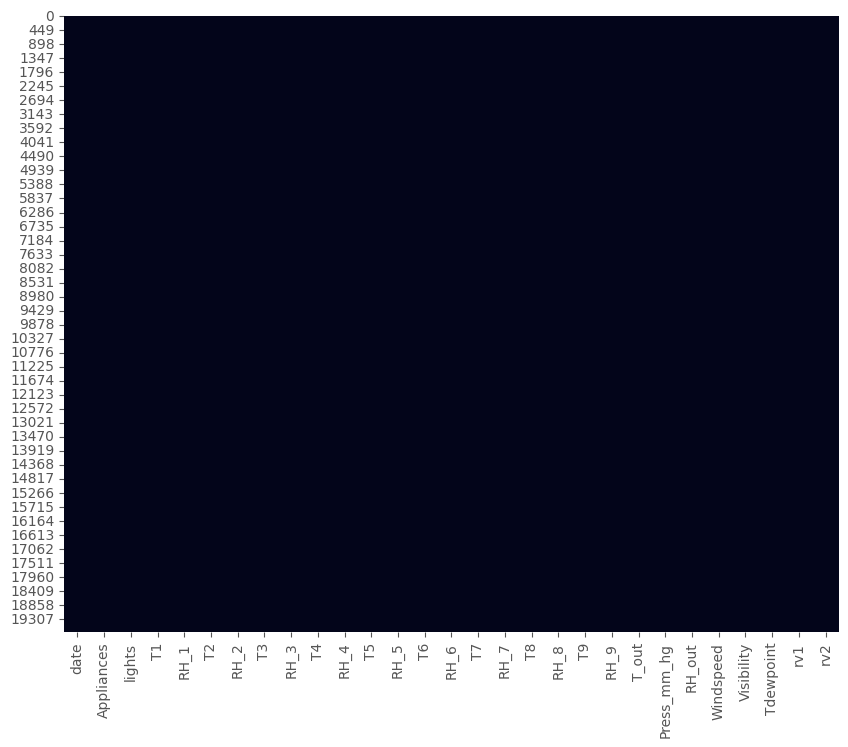

In [16]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False)

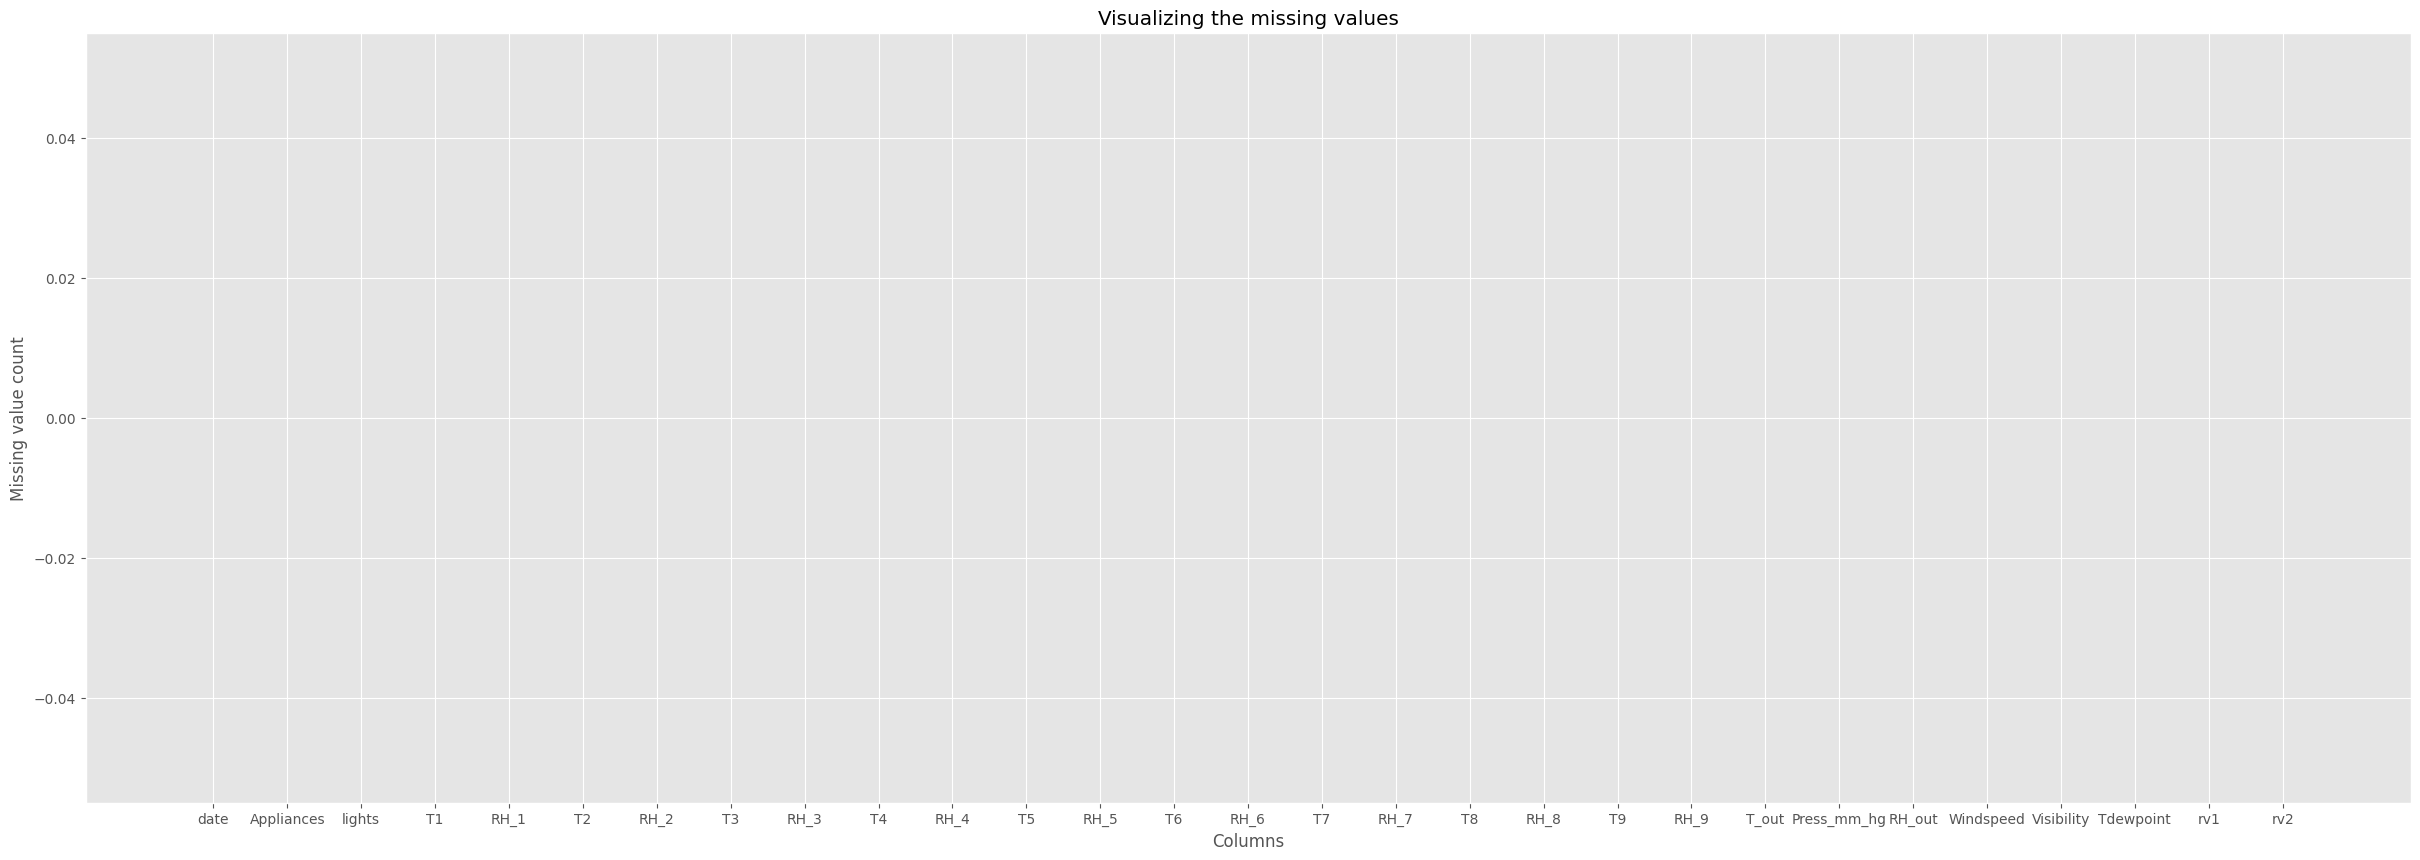

In [17]:
# Visualizing the missing values
courses = list(df.columns)
values = list(df.isnull().sum())
fig = plt.figure(figsize = (30, 10))
plt.bar(courses, values, color ='green',
        width = 0.6)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

The dataset was collected by sensors placed inside the house and outside readings came from the nearby weather station. The main attributes are temperature, humidity and pressure readings. Each observation measures electricity in a 10-minute interval. The temperatures and humidity have been averaged for 10-minute intervals.

Independent variables : 28(11 temperature, 10 humidity, 1 pressure, 1 light, 1 date/time, 1 visibility, 1 windspeed, 2 randoms)

Dependent variable : 1 (Appliances)

Total data : 19734 entries

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [19]:
# Dataset Describe
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

### Variables Description 

#### **Features**

* **T1 :**  Temperature in kitchen area, in Celsius

* **T2 :**  Temperature in living room area, in Celsius

* **T3 :**  Temperature in laundry room area, in Celsius

* **T4 :**  Temperature in office room, in Celsius

* **T5 :**  Temperature in bathroom, in Celsius

* **T6 :**  Temperature outside the building (north side), in Celsius

* **T7 :**  Temperature in ironing room, in Celsius

* **T8 :**  Temperature in teenager room 2, in Celsius

* **T9 :**  Temperature in parents room, in Celsius

* **RH1 :**  Humidity in kitchen area, in %

* **RH2 :**  Humidity in living room area, in %

* **RH3 :**  Humidity in laundry room area, in %

* **RH4 :**  Humidity in office room, in %

* **RH5 :**  Humidity in bathroom, in %

* **RH6 :**  Humidity in outside the building (north side), in %

* **RH7 :**  Humidity in ironing room, in %

* **RH8 :**  Humidity in teenager room 2, in % 

* **RH9 :**  Humidity in parents room, in %

* **To :**  Temperature outside (from Chievres weather station), in Celsius

* **Pressure :**  (from Chievres weather station), in mm Hg

* **Hg RHout :**  Humidity outside (from Chieves weather station), in %

* **Wind speed :**  (from Chievres weather station), in m/s

* **Visibility :**  (from Chievres weather station), in km

* **Tdewpoint :**  (from Chievres weather station), in Å°C

* **Appliances, energy use in Wh :**  Dependent variable

####**Feature ranges**



Temperature range : -6 to 30 deg

Humidity range : 1 to 100 %

Windspeed range: 0 to 14 m/s

Visibility range: 1 to 66 km

Pressure range: 729 to 772 mm Hg

Appliance Energy Usage range: 10 to 1080 Wh

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Unique values in ",i,"are",df[i].nunique(),".")

Unique values in  date are 19735 .
Unique values in  Appliances are 92 .
Unique values in  lights are 8 .
Unique values in  T1 are 722 .
Unique values in  RH_1 are 2547 .
Unique values in  T2 are 1650 .
Unique values in  RH_2 are 3376 .
Unique values in  T3 are 1426 .
Unique values in  RH_3 are 2618 .
Unique values in  T4 are 1390 .
Unique values in  RH_4 are 2987 .
Unique values in  T5 are 2263 .
Unique values in  RH_5 are 7571 .
Unique values in  T6 are 4446 .
Unique values in  RH_6 are 9709 .
Unique values in  T7 are 1955 .
Unique values in  RH_7 are 5891 .
Unique values in  T8 are 2228 .
Unique values in  RH_8 are 6649 .
Unique values in  T9 are 924 .
Unique values in  RH_9 are 3388 .
Unique values in  T_out are 1730 .
Unique values in  Press_mm_hg are 2189 .
Unique values in  RH_out are 566 .
Unique values in  Windspeed are 189 .
Unique values in  Visibility are 413 .
Unique values in  Tdewpoint are 1409 .
Unique values in  rv1 are 19735 .
Unique values in  rv2 are 19735 .


## 3. ***Data Wrangling***

####**Splitting date time**

##### Based on year

In [21]:
# extracting year from date column
df['year']=pd.DatetimeIndex(df['date']).year

In [22]:
# lets see the count of years
df.groupby(['year'])['year'].count()

year
2016    19735
Name: year, dtype: int64

All the data is from the year 2016.

So there is no need to have the specific column for that.
Droping year column

In [23]:
# droping year column from dataset
df.drop('year',axis=1,inplace=True)

##### Based on month

In [24]:
# extracting month from date column
df['month']=pd.DatetimeIndex(df['date']).month

In [25]:
# lets see the count of month
df.groupby(['month'])['month'].count()

month
1    2922
2    4176
3    4464
4    4320
5    3853
Name: month, dtype: int64

Data is split into 5 different month from JAN 2016 to MAY 2016

##### Based on days

In [26]:
# extracting day from date column
df['day']=pd.DatetimeIndex(df['date']).weekday

In [27]:
# lets see the count of days
df.groupby(['day'])['day'].count()

day
0    2778
1    2880
2    2880
3    2880
4    2845
5    2736
6    2736
Name: day, dtype: int64

In [28]:
df['day_name']=df['date'].dt.strftime('%A')

In [29]:
# lets see the count of  days with name
df.groupby(['day_name'])['day_name'].count()

day_name
Friday       2845
Monday       2778
Saturday     2736
Sunday       2736
Thursday     2880
Tuesday      2880
Wednesday    2880
Name: day_name, dtype: int64

In [30]:
# droping day column from dataset
df.drop('day',axis=1,inplace=True)

#####Based on time

In [31]:
#to get hour and minute
df['time']=df['date'].dt.strftime('%H')

In [32]:
# lets see the count of time
df.groupby(['time'])['time'].count()

time
00    822
01    822
02    822
03    822
04    822
05    822
06    822
07    822
08    822
09    822
10    822
11    822
12    822
13    822
14    822
15    822
16    822
17    828
18    823
19    822
20    822
21    822
22    822
23    822
Name: time, dtype: int64

Data is evenly splitted based on time.
Each hourly period had 822 records. 

In [33]:
# As we splitted all the data time quantity, there is no need to have date column.
# Dropinf date column
df.drop('date',axis=1,inplace=True)

#### **Feature Renaming**

Renaming column name for better understanding

In [34]:
# creating dictionary of temperature features
t_dict = {
    'T1' : 't_kitchen', 'T2' : 't_living', 'T3' : 't_laundry', 
    'T4' : 't_office', 'T5' : 't_bath', 'T6' : 't_outside',
    'T7' : 't_iron', 'T8' : 't_teen', 'T9' : 't_parents', 
    'T_out' : 't_station'
}

In [35]:
# renaming temperature features in dataset
df = df.rename(columns=t_dict)

In [36]:
# creating dictionary of humidity features
h_dict = {
    'RH_1' : 'h_kitchen', 'RH_2' : 'h_living', 'RH_3' : 'h_laundry', 
    'RH_4' : 'h_office', 'RH_5' : 'h_bath', 'RH_6' : 'h_outside',
    'RH_7' : 'h_iron', 'RH_8' : 'h_teen', 'RH_9' : 'h_parents', 
    'RH_out' : 'h_station'
}

In [37]:
# renaming humidity features in dataset
df = df.rename(columns=h_dict)

In [38]:
# Checking data set
df.head()

Appliances  lights  t_kitchen  h_kitchen  t_living   h_living  t_laundry  \
0          60      30      19.89  47.596667      19.2  44.790000      19.79   
1          60      30      19.89  46.693333      19.2  44.722500      19.79   
2          50      30      19.89  46.300000      19.2  44.626667      19.79   
3          50      40      19.89  46.066667      19.2  44.590000      19.79   
4          60      40      19.89  46.333333      19.2  44.530000      19.79   

   h_laundry   t_office   h_office  ...  Press_mm_hg  h_station  Windspeed  \
0  44.730000  19.000000  45.566667  ...        733.5       92.0   7.000000   
1  44.790000  19.000000  45.992500  ...        733.6       92.0   6.666667   
2  44.933333  18.926667  45.890000  ...        733.7       92.0   6.333333   
3  45.000000  18.890000  45.723333  ...        733.8       92.0   6.000000   
4  45.000000  18.890000  45.530000  ...        733.9       92.0   5.666667   

   Visibility  Tdewpoint        rv1        rv2  month  day_name  time  
0   63.000000        5.3  13.275433  13.275433      1    Monday    17  
1   59.166667        5.2  18.606195  18.606195      1    Monday    17  
2   55.333333        5.1  28.642668  28.642668      1    Monday    17  
3   51.500000        5.0  45.410389  45.410389      1    Monday    17  
4   47.666667        4.9  10.084097  10.084097      1    Monday    17  

[5 rows x 31 columns]

In [39]:
# Discription
df.describe()

Appliances        lights     t_kitchen     h_kitchen      t_living  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

           h_living     t_laundry     h_laundry      t_office      h_office  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...     h_parents     t_station   Press_mm_hg     h_station  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     41.552401      7.411665    755.522602     79.750418   
std    ...      4.151497      5.317409      7.399441     14.901088   
min    ...     29.166667     -5.000000    729.300000     24.000000   
25%    ...     38.500000      3.666667    750.933333     70.333333   
50%    ...     40.900000      6.916667    756.100000     83.666667   
75%    ...     44.338095     10.408333    760.933333     91.666667   
max    ...     53.326667     26.100000    772.300000    100.000000   

          Windspeed    Visibility     Tdewpoint           rv1           rv2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       4.039752     38.330834      3.760707     24.988033     24.988033   
std        2.451221     11.794719      4.194648     14.496634     14.496634   
min        0.000000      1.000000     -6.600000      0.005322      0.005322   
25%        2.000000     29.000000      0.900000     12.497889     12.497889   
50%        3.666667     40.000000      3.433333     24.897653     24.897653   
75%        5.500000     40.000000      6.566667     37.583769     37.583769   
max       14.000000     66.000000     15.500000     49.996530     49.996530   

              month  
count  19735.000000  
mean       3.101647  
std        1.339200  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  

[8 rows x 29 columns]

#### **Skewness Check**


In [40]:
num_feats = df.dtypes[df.dtypes!='object'].index

skew_feats = df[num_feats].skew().sort_values(ascending= False)
skewness=pd.DataFrame({'skew':skew_feats})
print(skewness)

                 skew
Appliances   3.386367
lights       2.195155
h_bath       1.866820
t_living     0.889658
Windspeed    0.859982
t_outside    0.597471
t_bath       0.558220
t_station    0.534273
h_laundry    0.467589
h_kitchen    0.465774
t_laundry    0.450777
h_office     0.444614
Visibility   0.441554
t_parents    0.382711
h_parents    0.368937
h_teen       0.308036
t_iron       0.254722
h_iron       0.242141
Tdewpoint    0.239374
t_office     0.170384
t_kitchen    0.120917
rv1          0.004945
rv2          0.004945
month       -0.067969
h_outside   -0.241961
t_teen      -0.256151
h_living    -0.268247
Press_mm_hg -0.420442
h_station   -0.922997


### What all manipulations have you done and insights you found?

#### Manipulations

1. Splitting date columns into year, months, day, time.
2. It will help in analysing the data on the bases of months, days and hours.
3. Dropped date and year columns due to no further use of them.
4. Renaming of some features, for better understanding and readibility.


#### Insights

1. All the data are from Jan 2016 to May 2016 i.e. approx 5 months.
2. Data are evenly splitted on hourly bases i.e. 822 records for every hour.
3. Avg outside temp was around 7.5 degree and ranges from -6 to 28 degree.
4. Avg temp inside the building was around 20 degree from all the rooms and ranges from 14 to 30 degree.
5. Average humidity outside the building has been higher than the average humidity inside.
6. Average humidity at the weather station is significantly higher compared to outside humidity near the building.
7. Average humidity in the bathroom is significantly higher compared to other rooms due to obvious reasons.
8. Kids and parent room show a comparatively higher average humidity as well signifying the fact that, inhabitants of this building spend most of their time in these buildings.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

#### **Checking distribution of dependent variable.**

<Axes: xlabel='Appliances', ylabel='Density'>

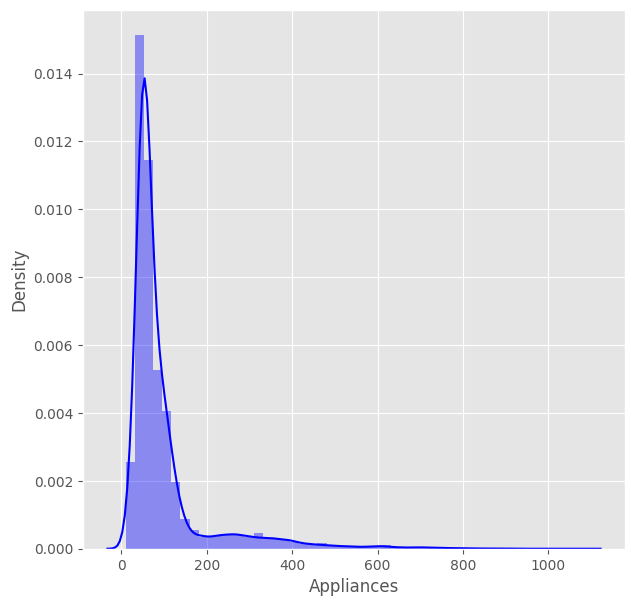

In [41]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(df['Appliances'], color="b")

Graph is highly right skewed, appling tranformation using inverse method.

<Axes: xlabel='Appliances', ylabel='Density'>

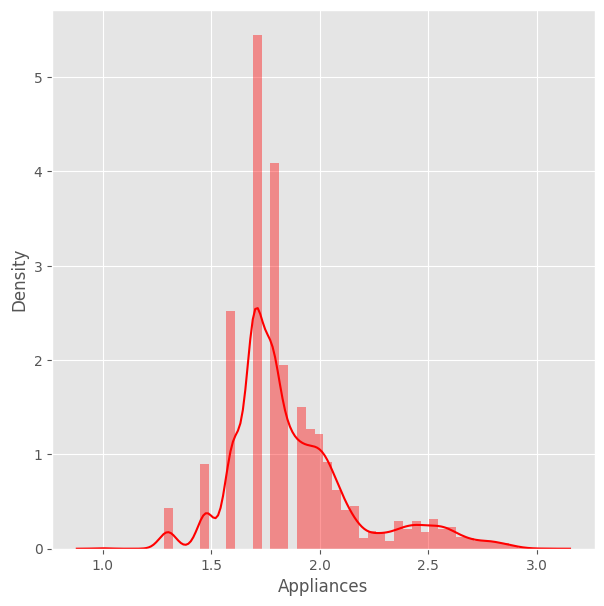

In [42]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Appliances']),color="r")

##### 1. Why did you pick the specific chart?

The chart shows the distribution curve and it helps to check the skewness of the variable.

##### 2. What is/are the insight(s) found from the chart?

Distribution of dependent variable is highly right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Checking distribution of all Independent numeric variable.**

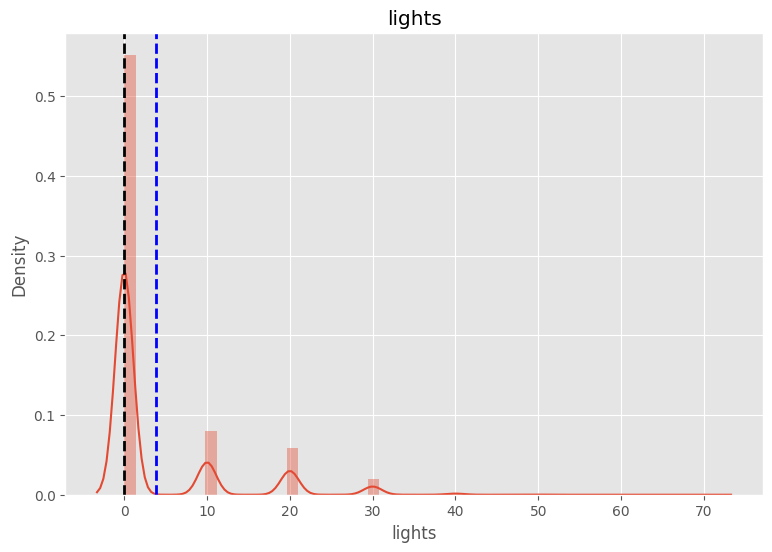

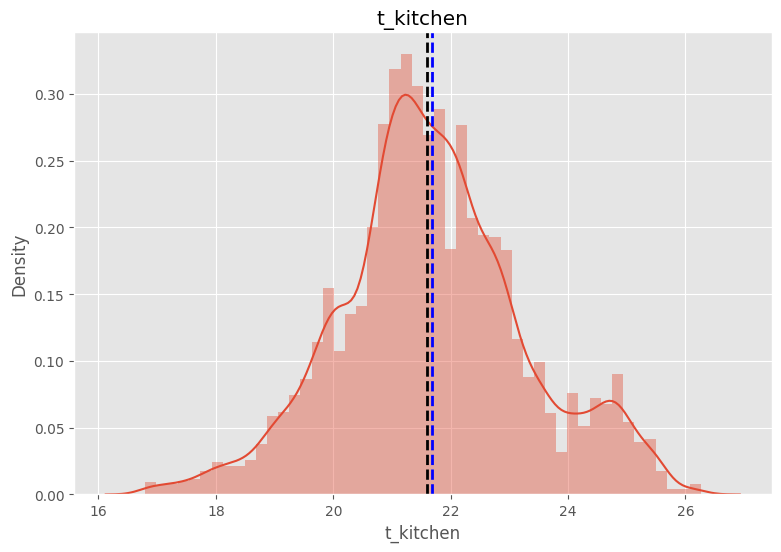

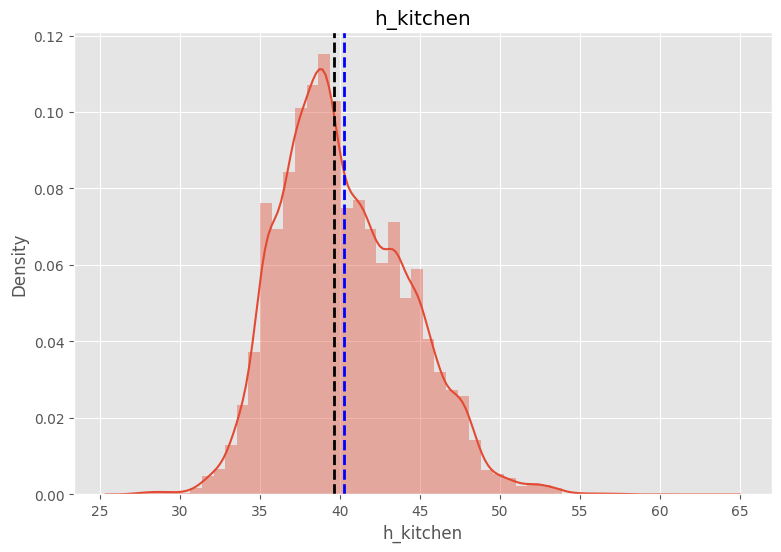

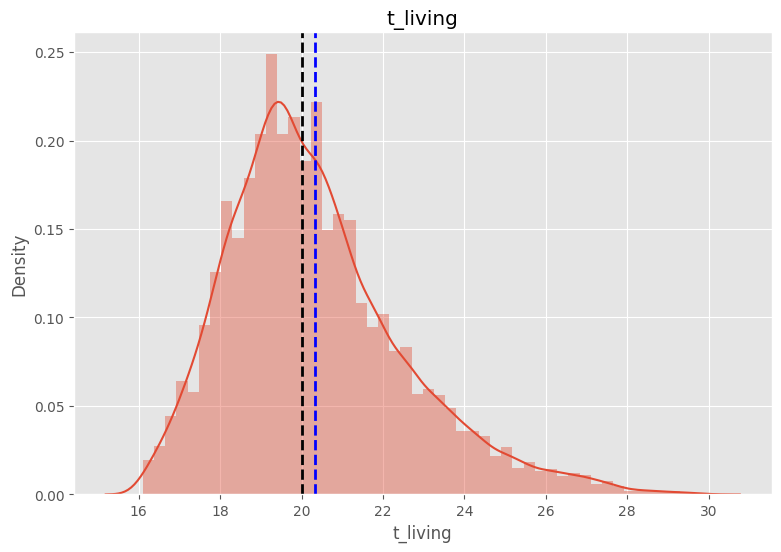

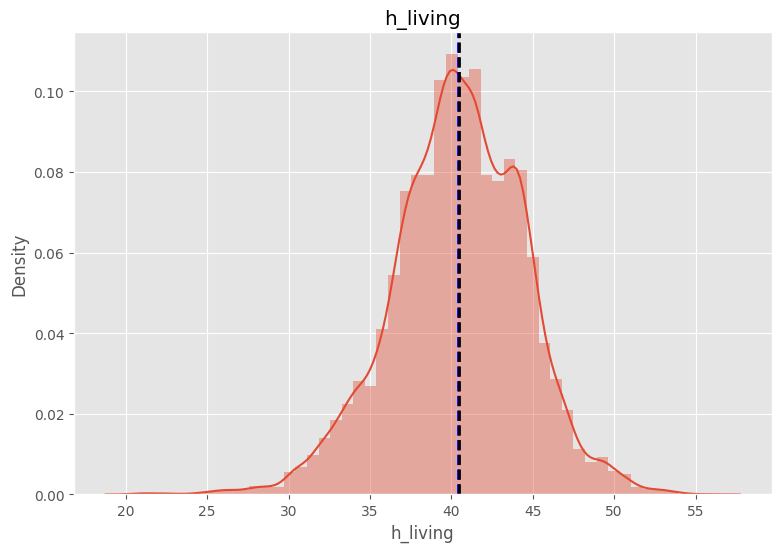

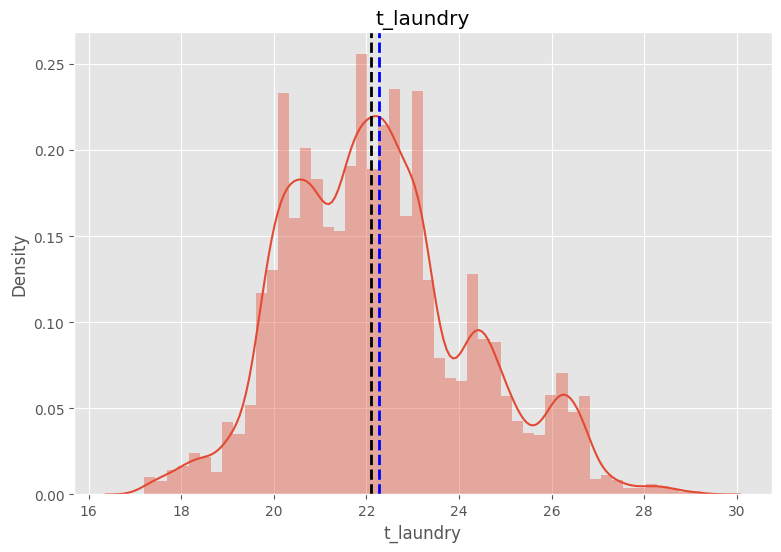

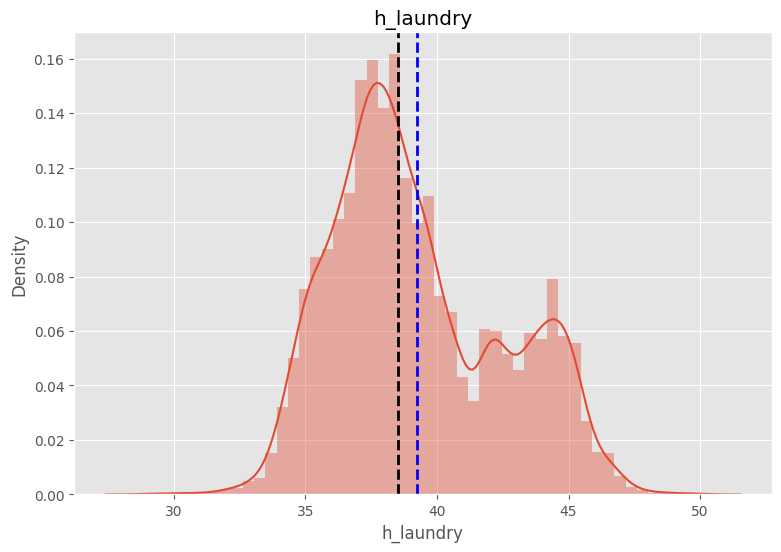

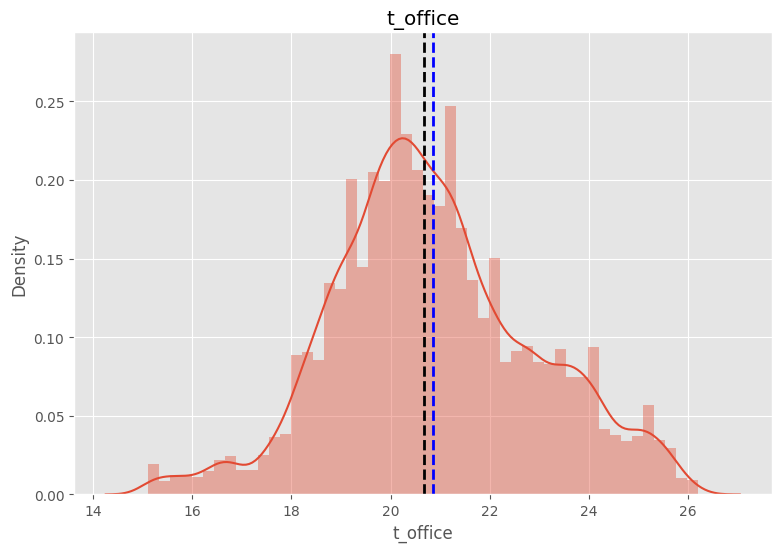

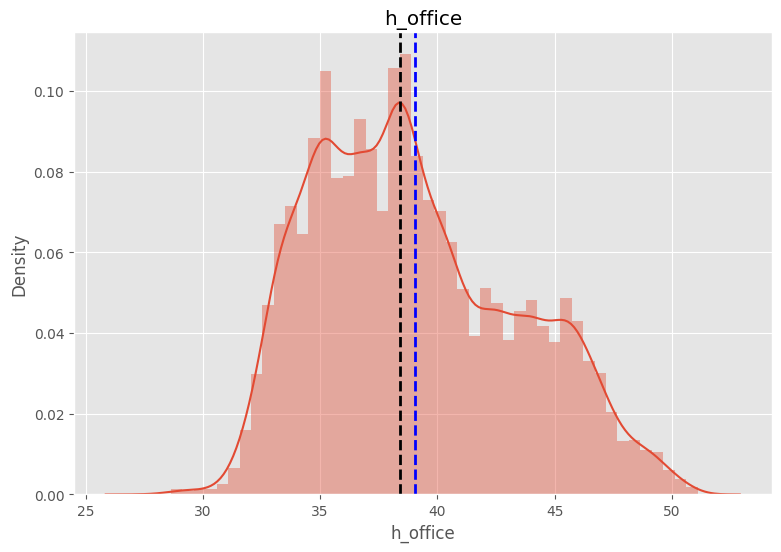

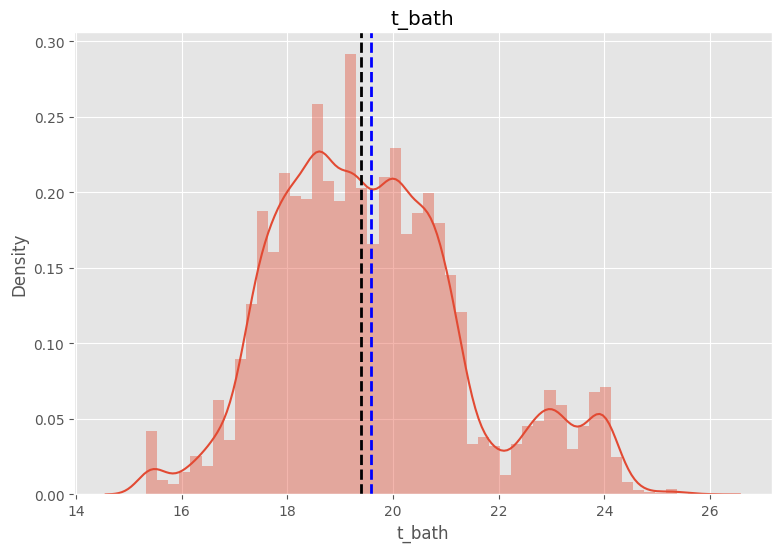

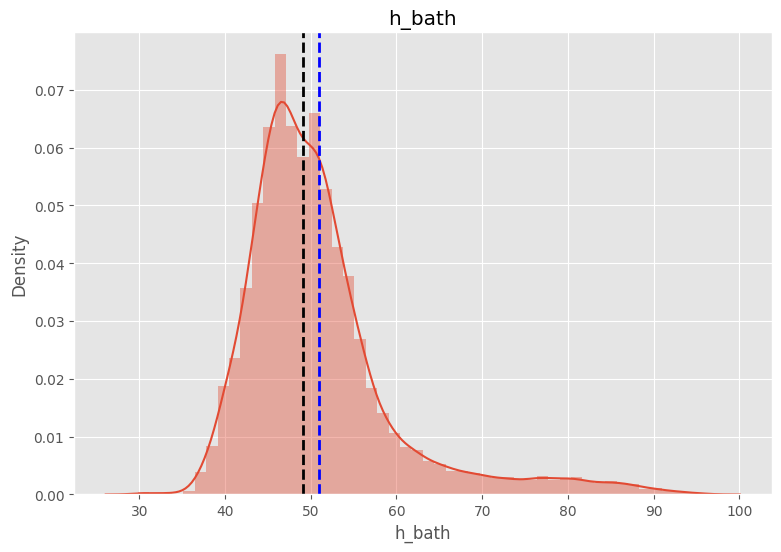

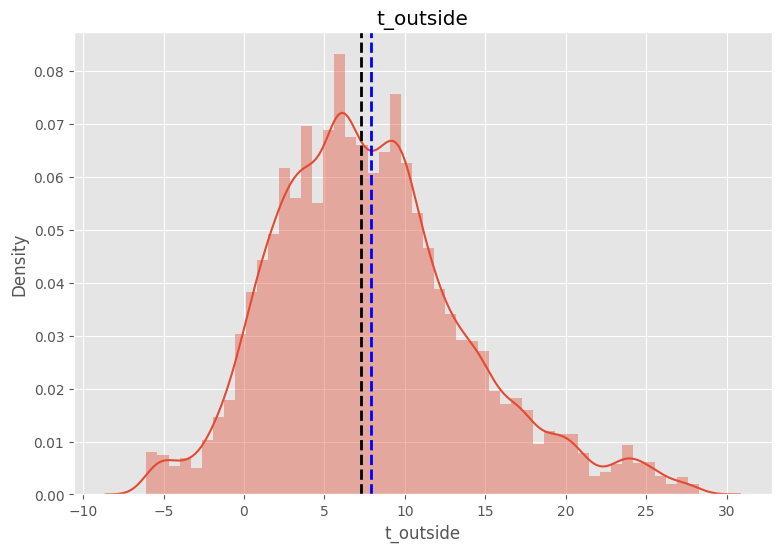

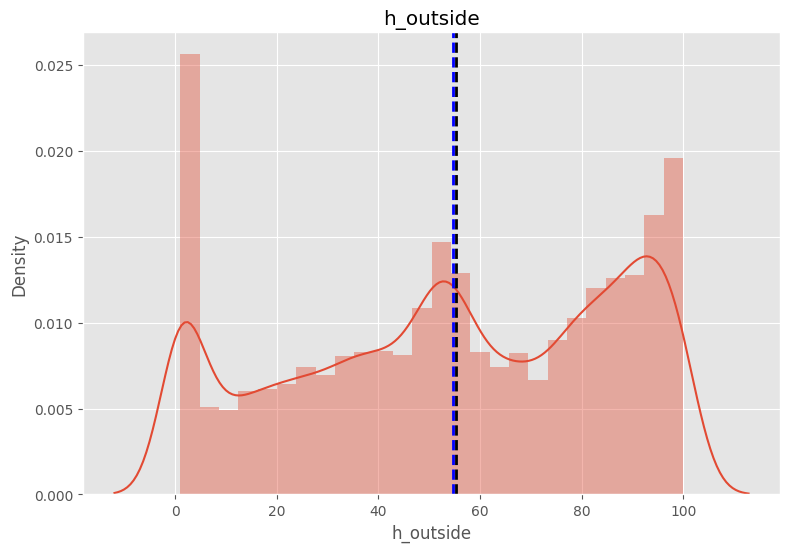

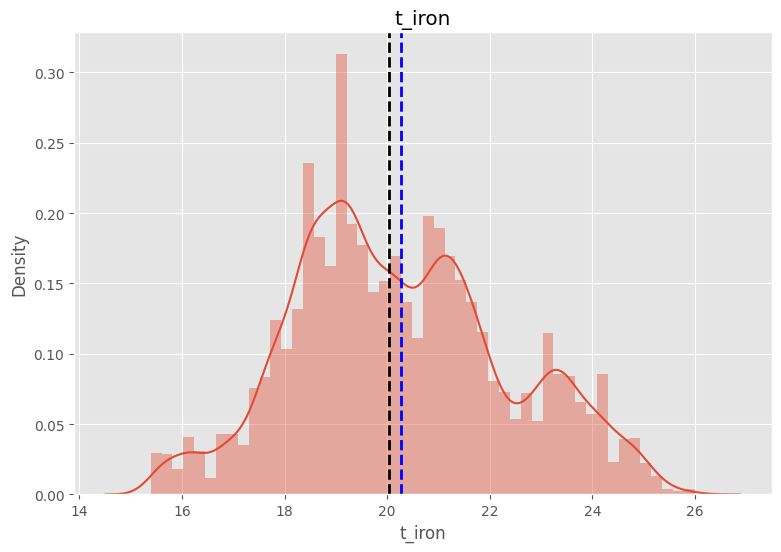

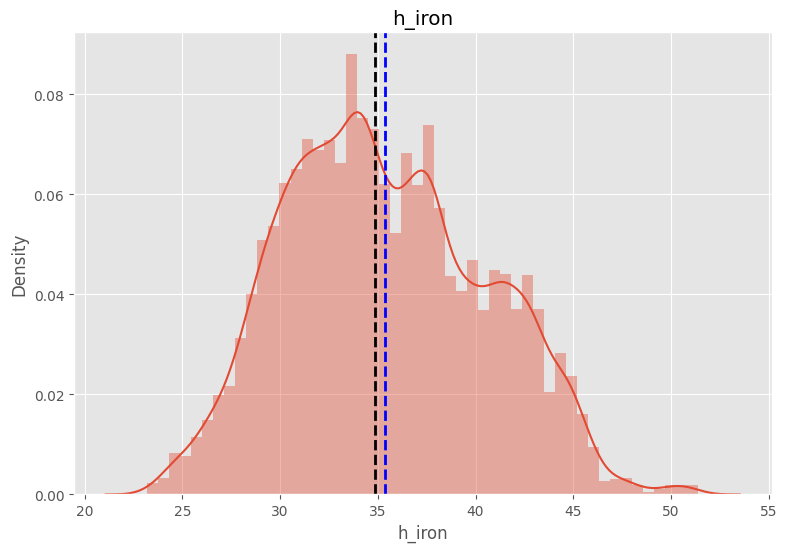

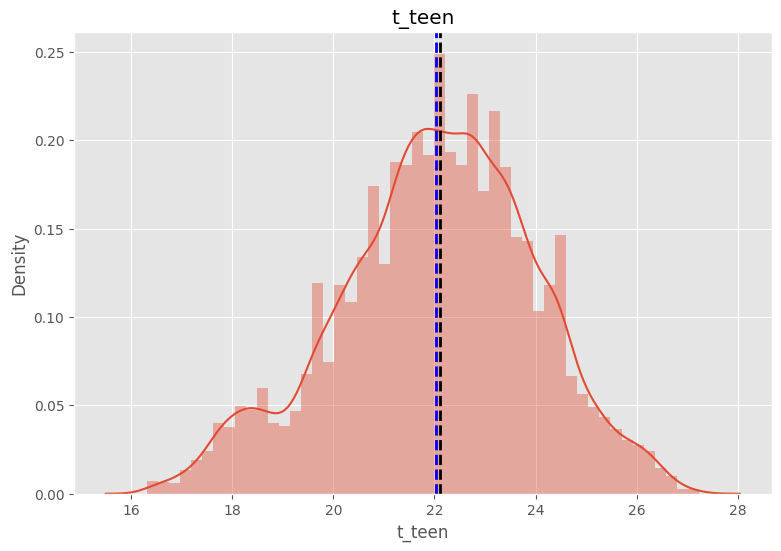

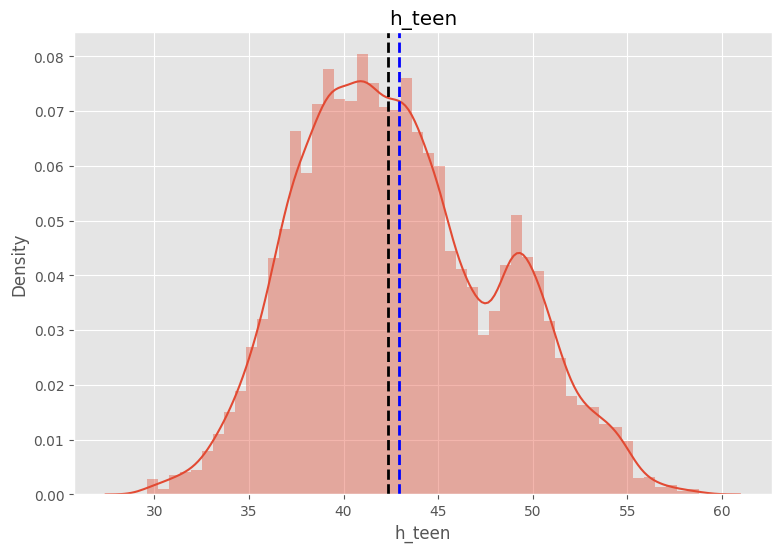

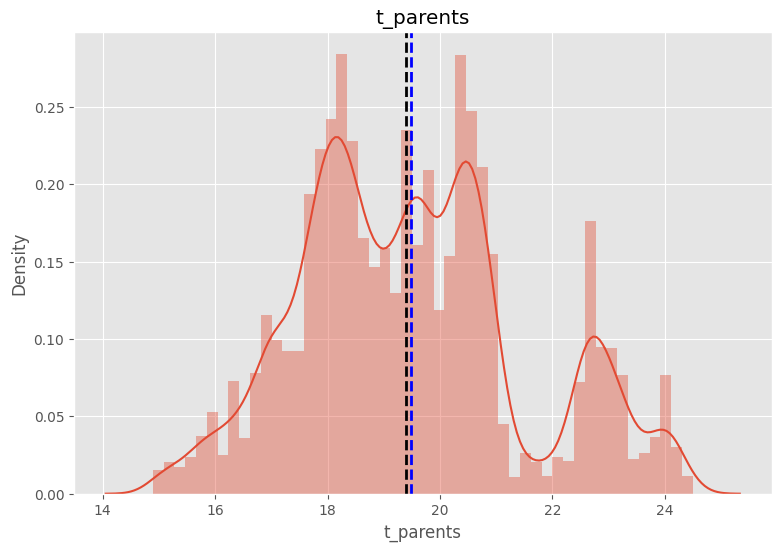

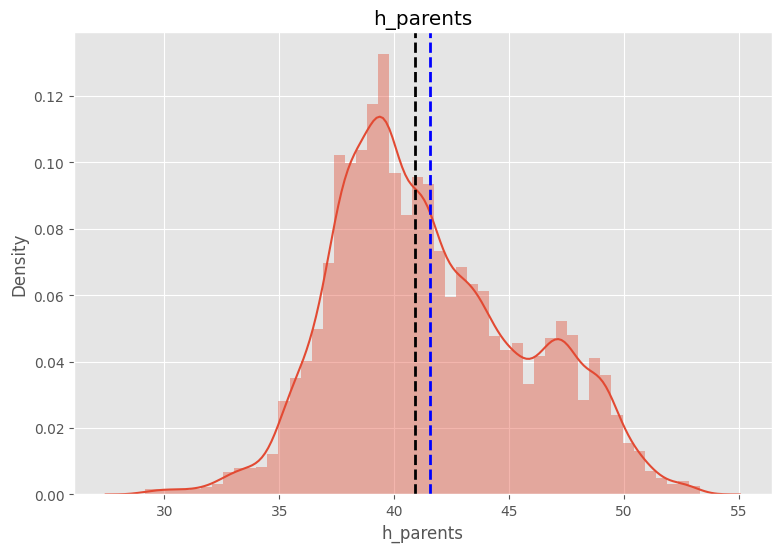

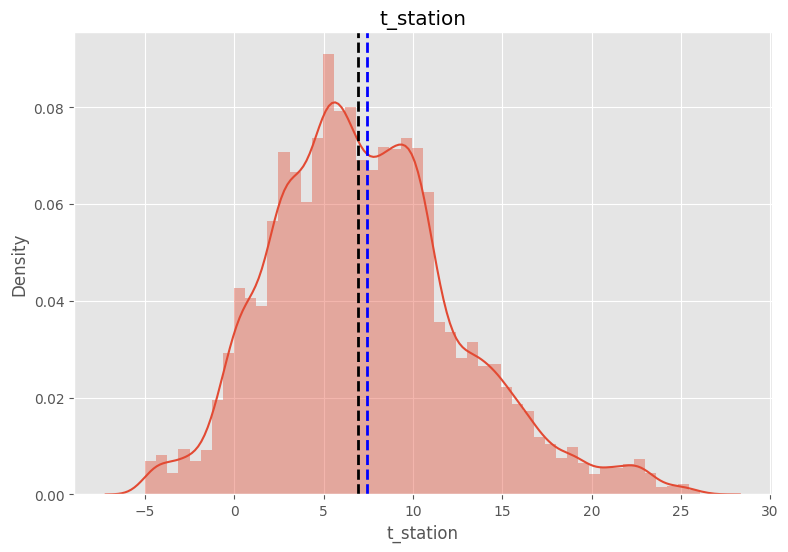

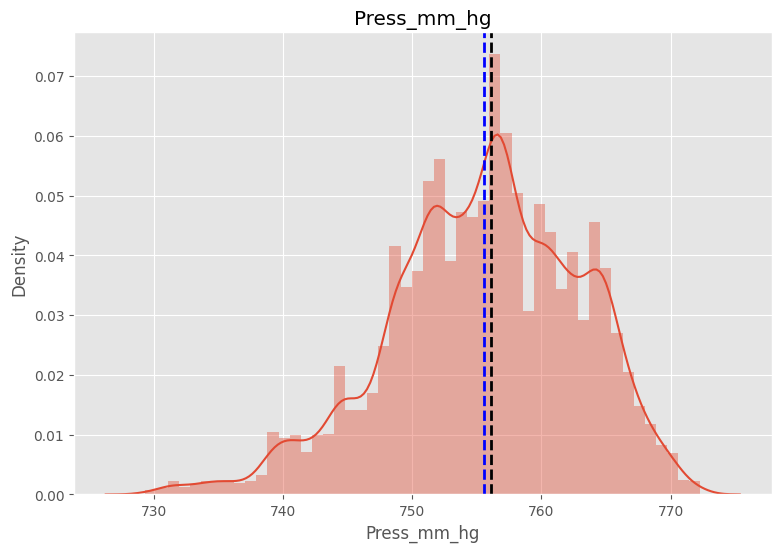

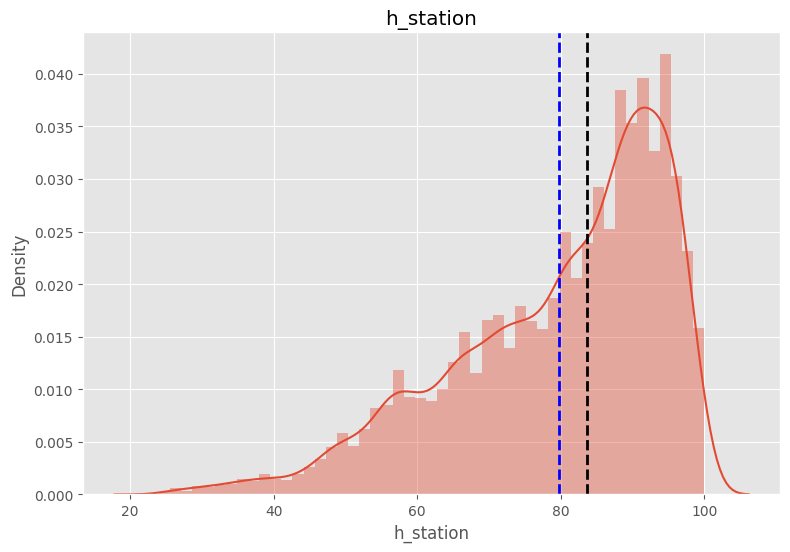

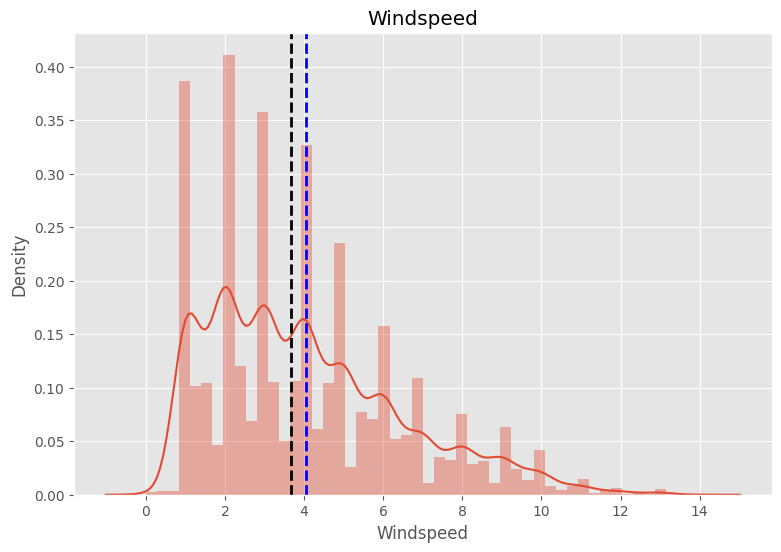

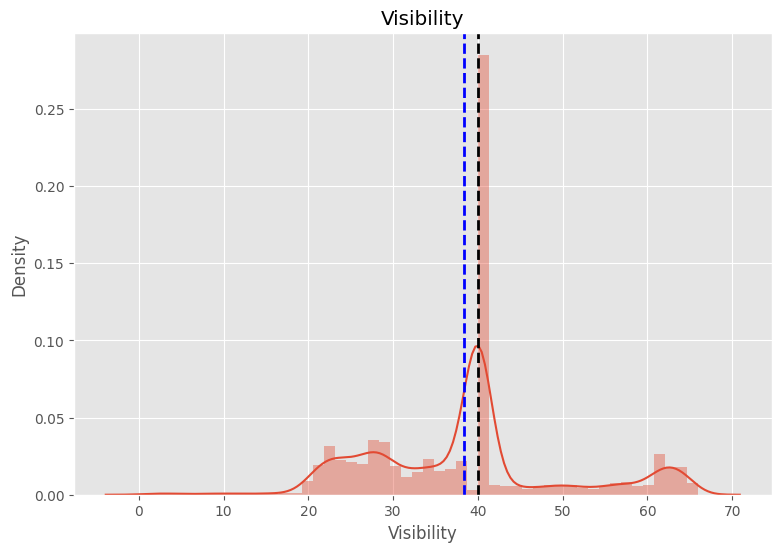

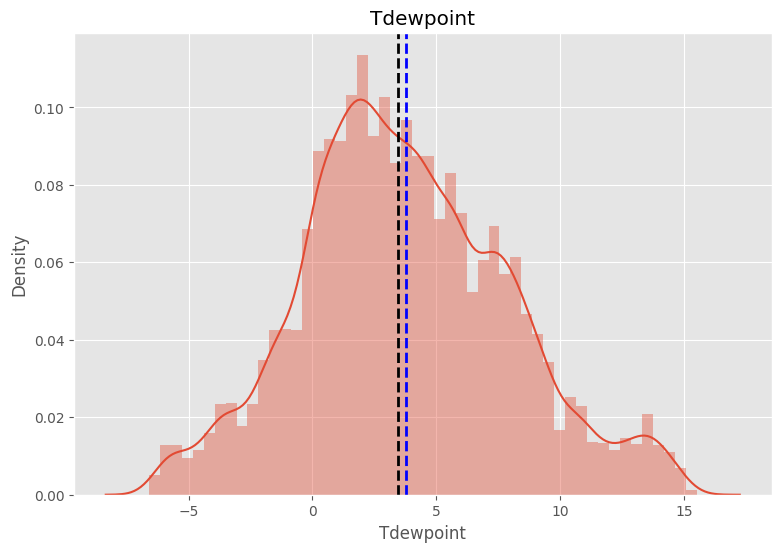

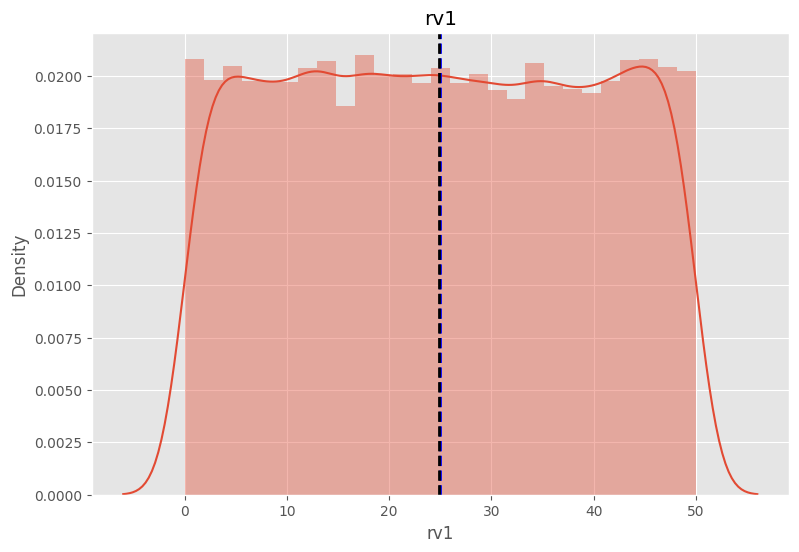

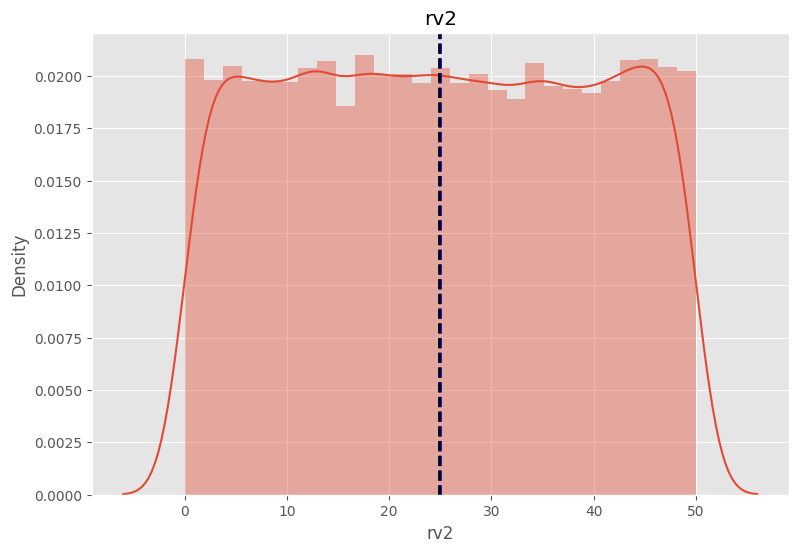

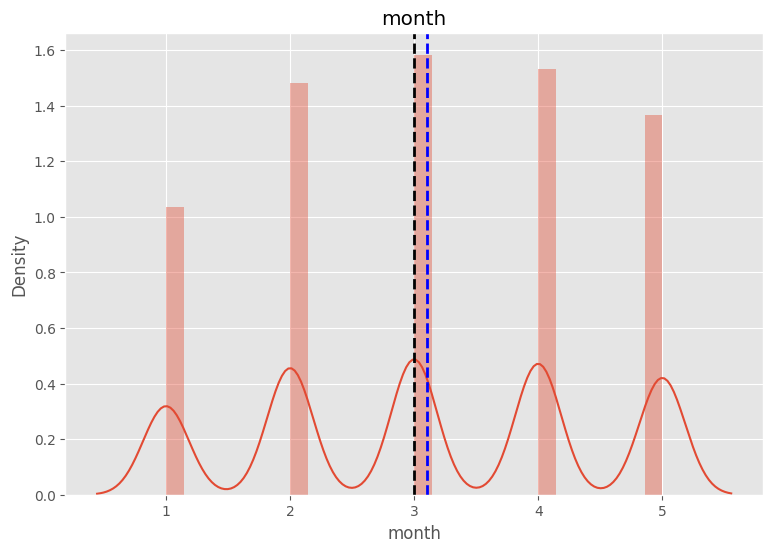

In [43]:
# plot a bar plot for each numerical feature count 
for col in num_feats[1:]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='black', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of all the numerical variable, using mean and medium test to see the skewness of all the features.

##### 2. What is/are the insight(s) found from the chart?

1. Huge data in the lights feature has a value of 0.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Checking feature correlation using ScatterPlot.**

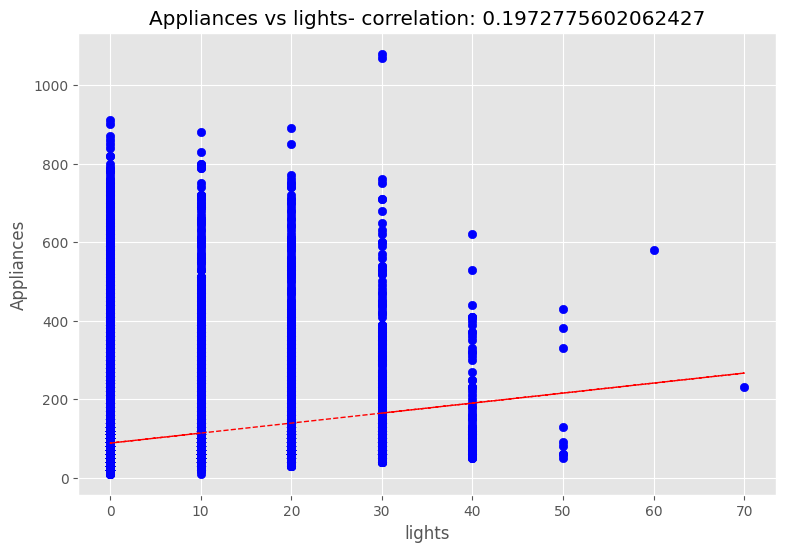

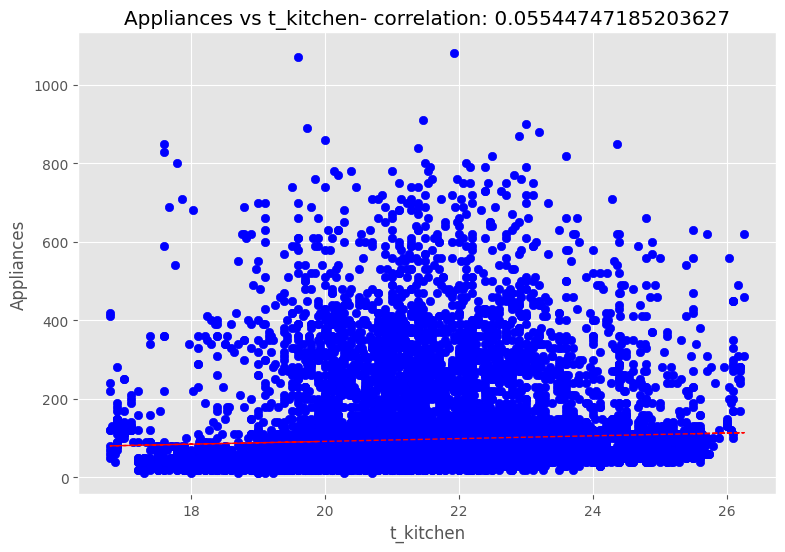

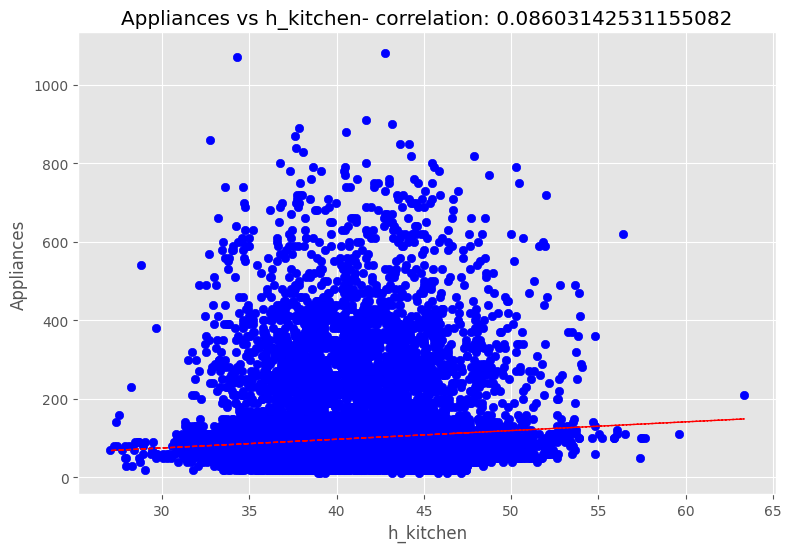

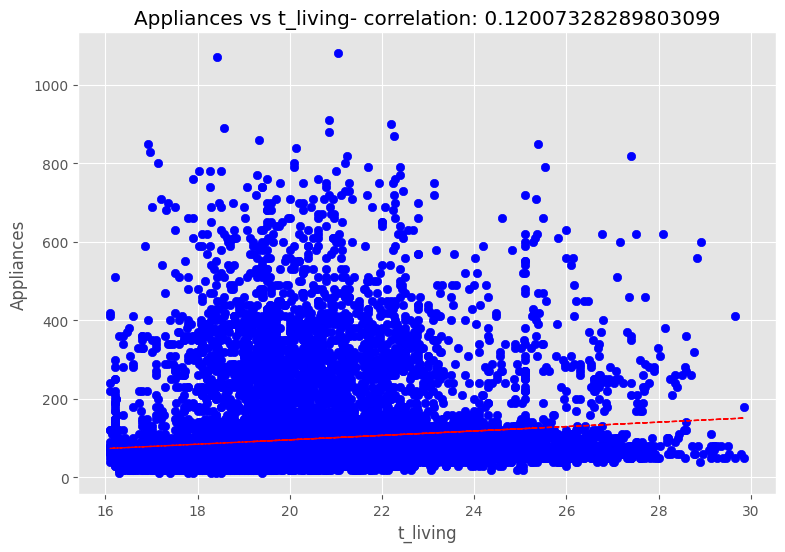

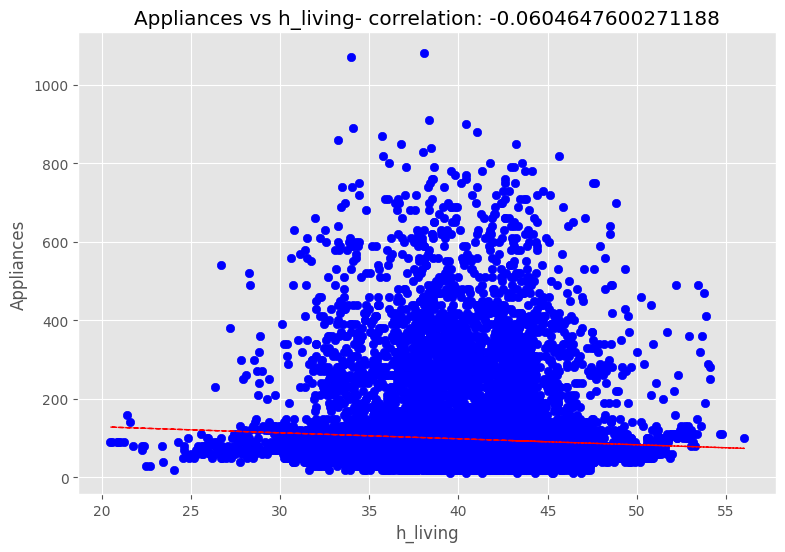

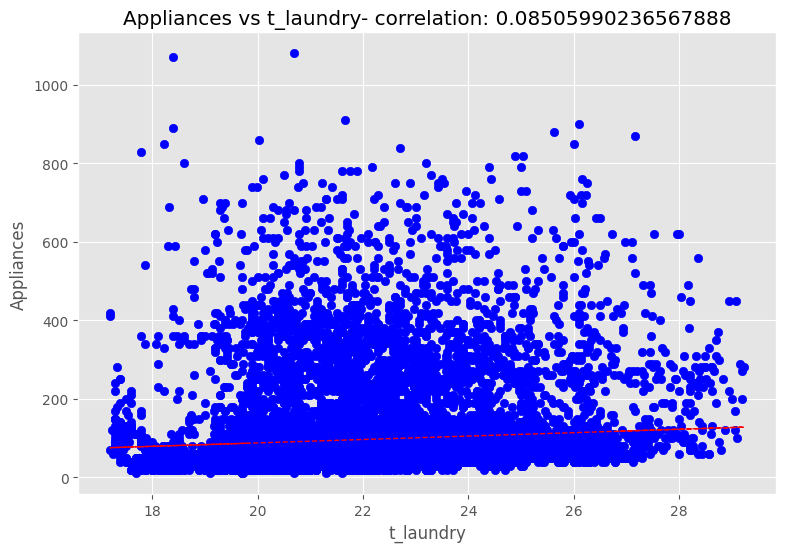

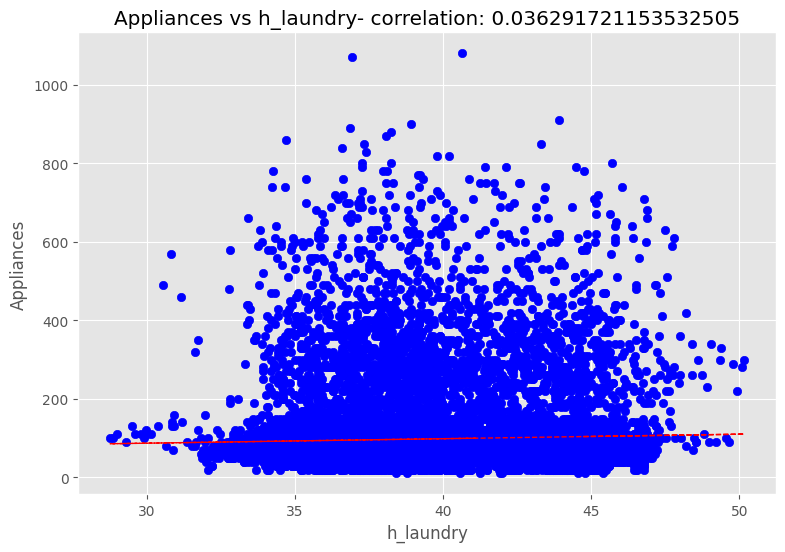

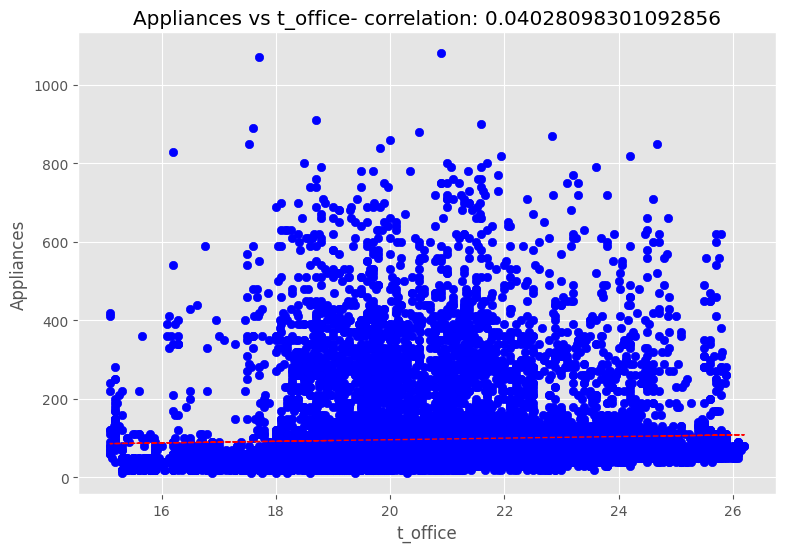

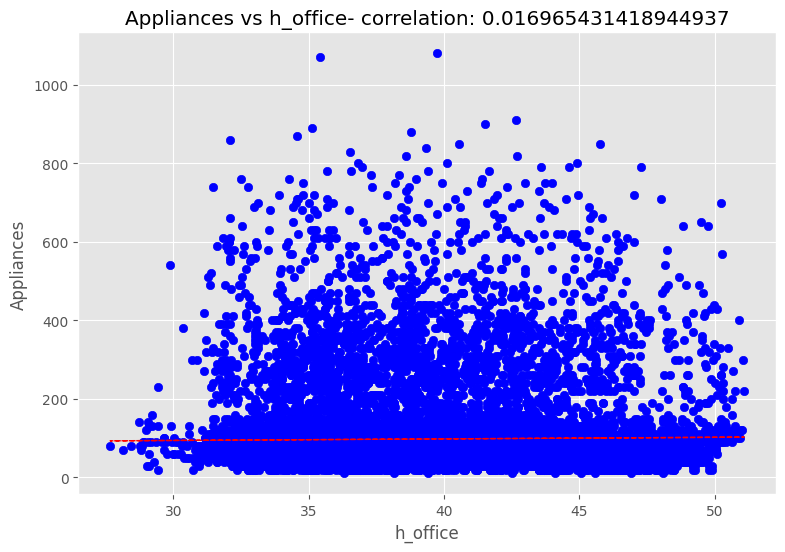

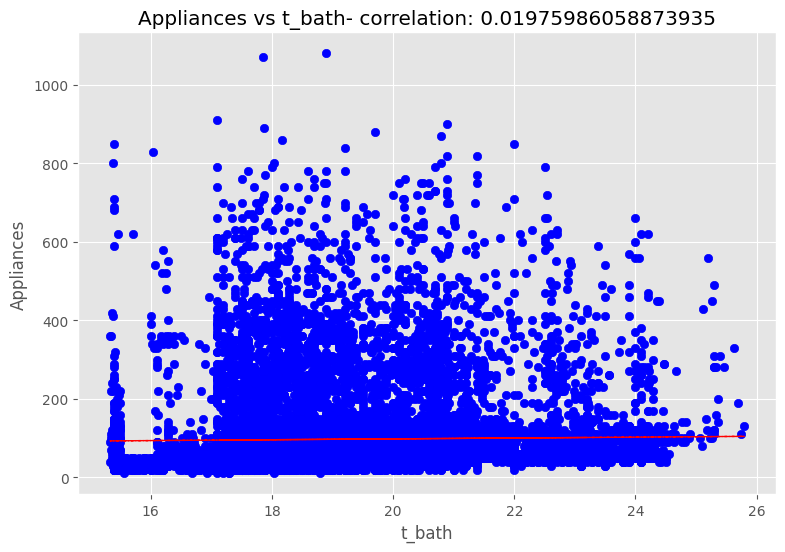

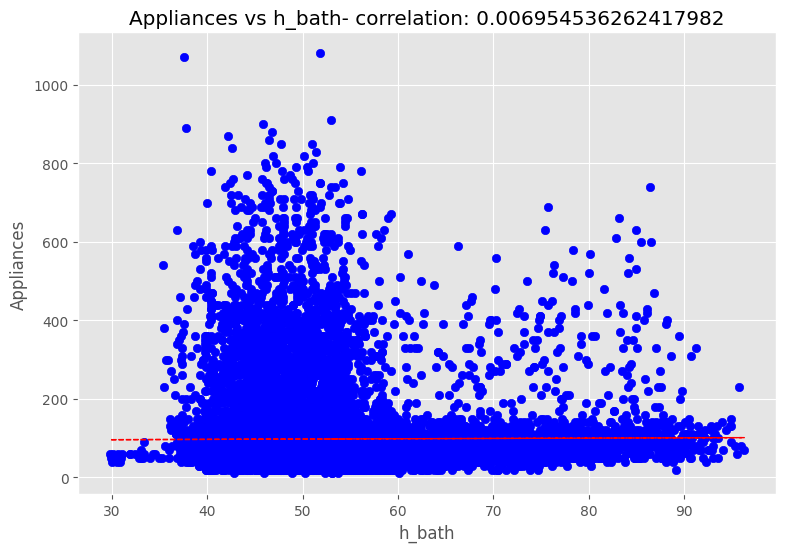

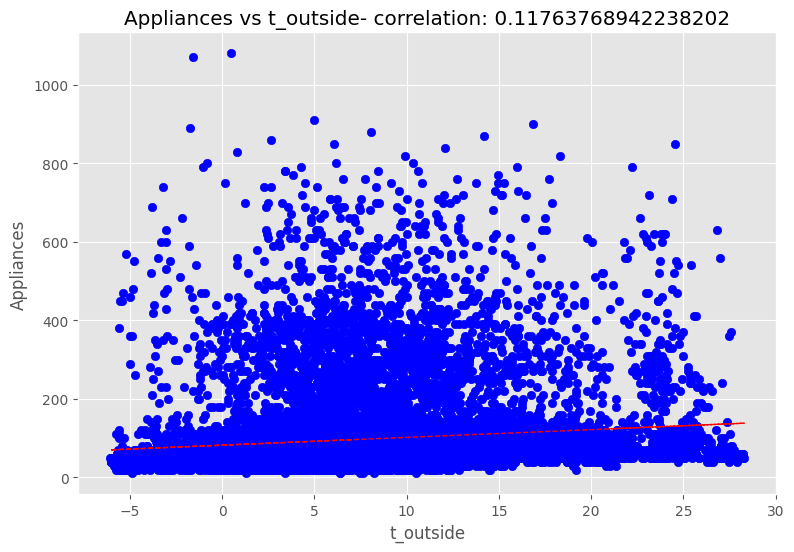

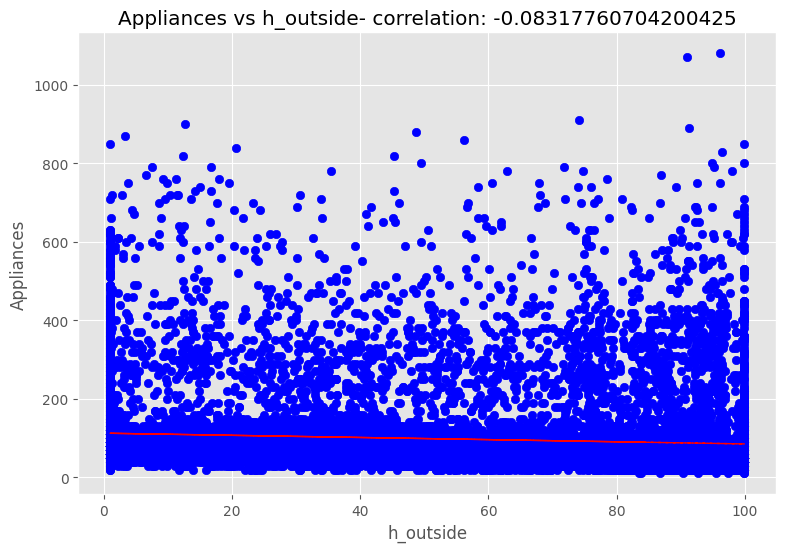

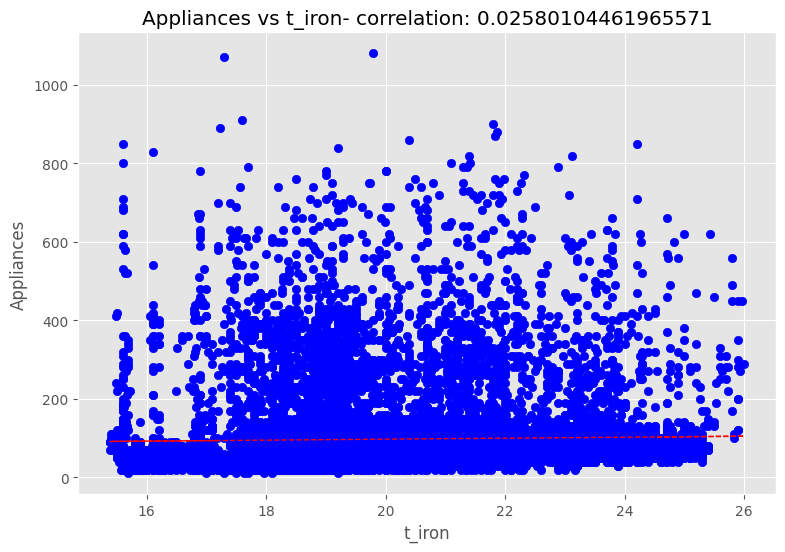

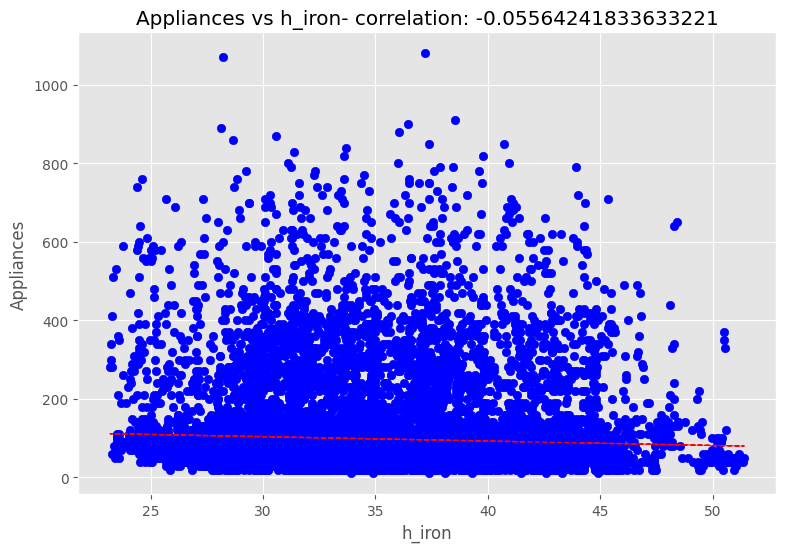

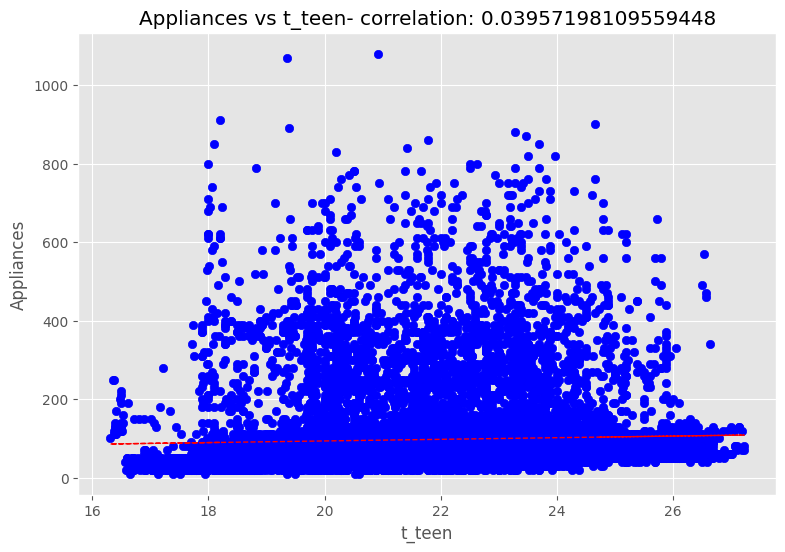

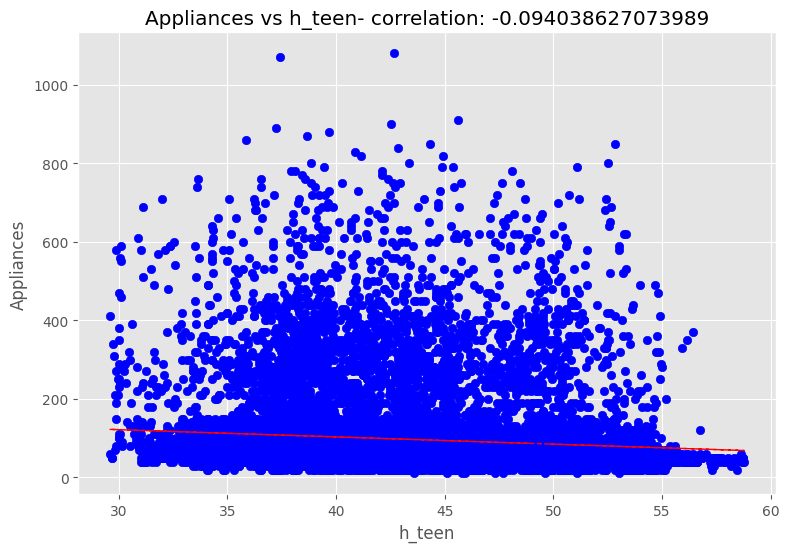

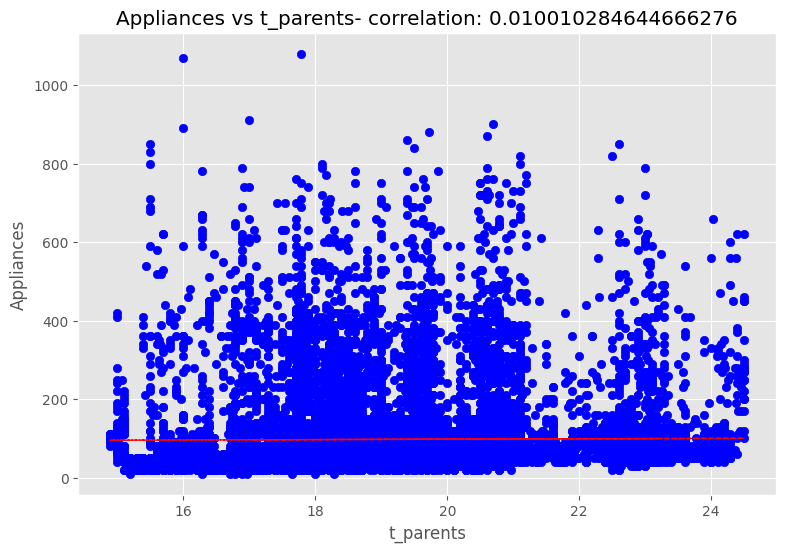

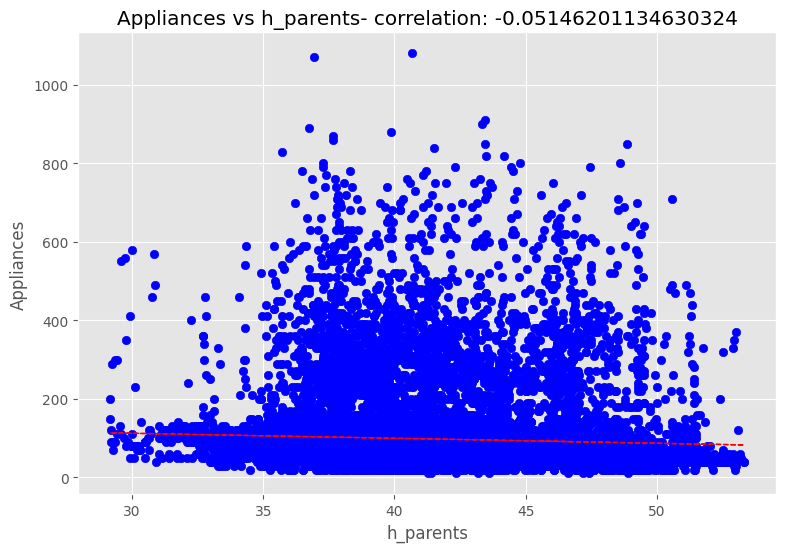

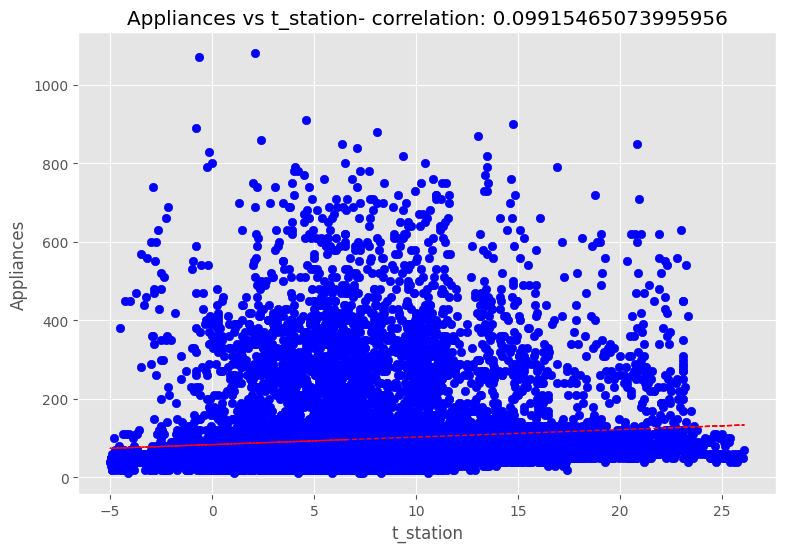

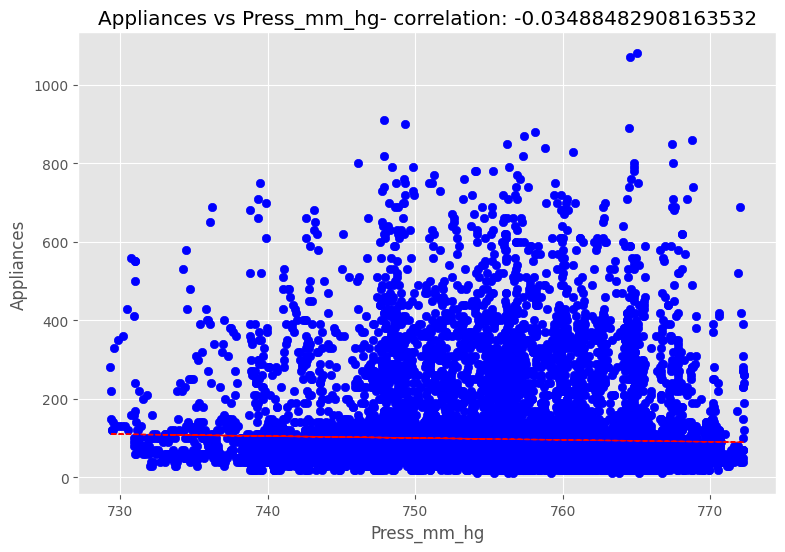

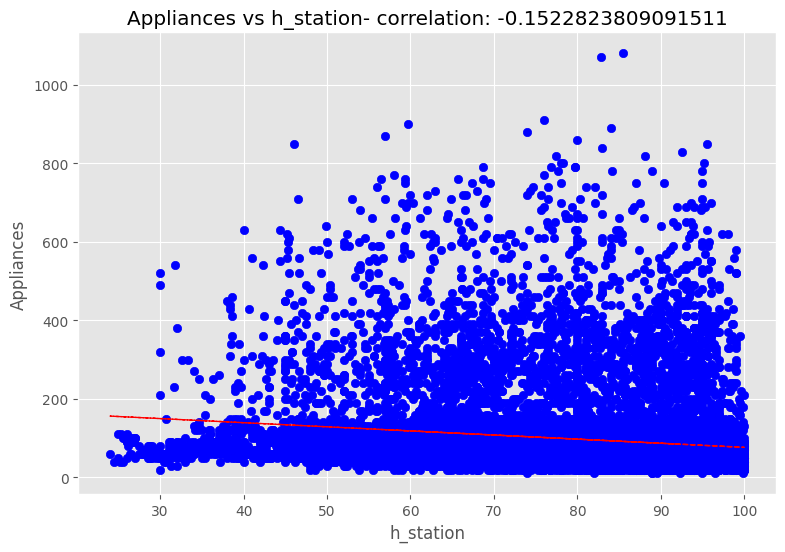

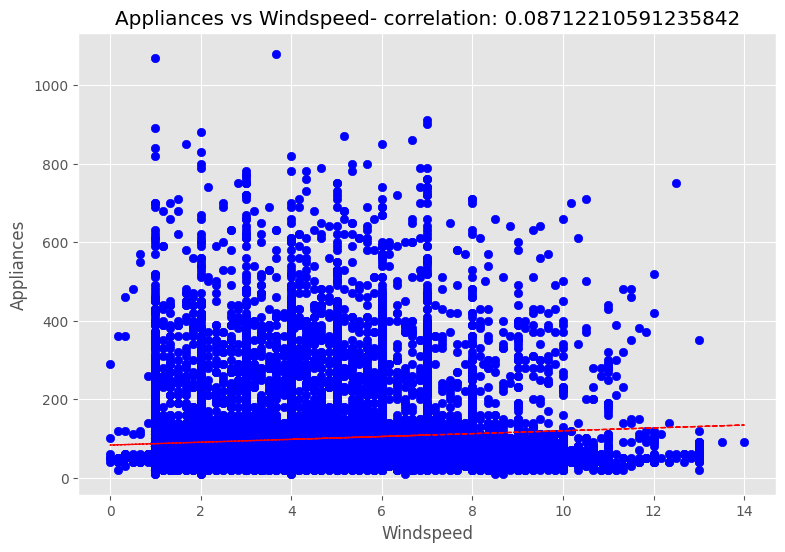

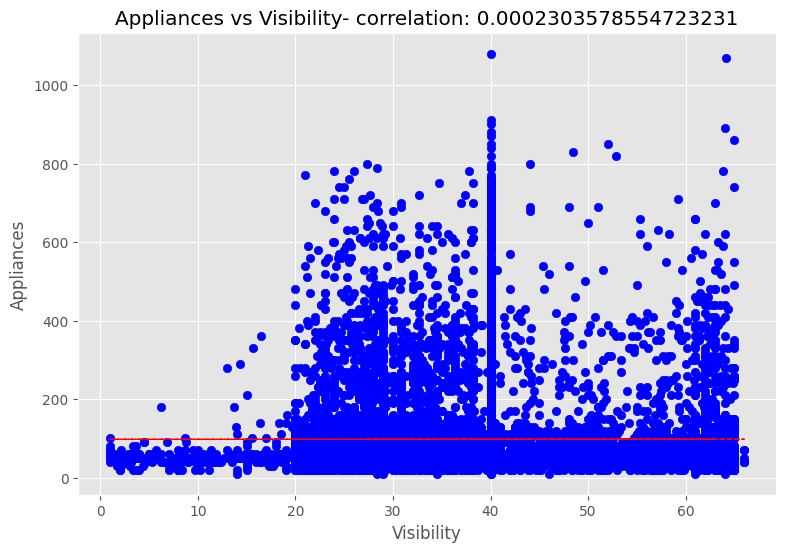

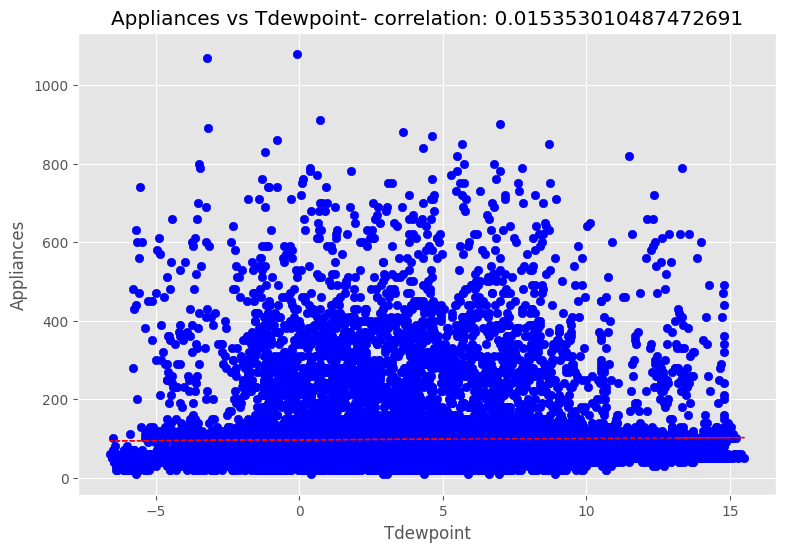

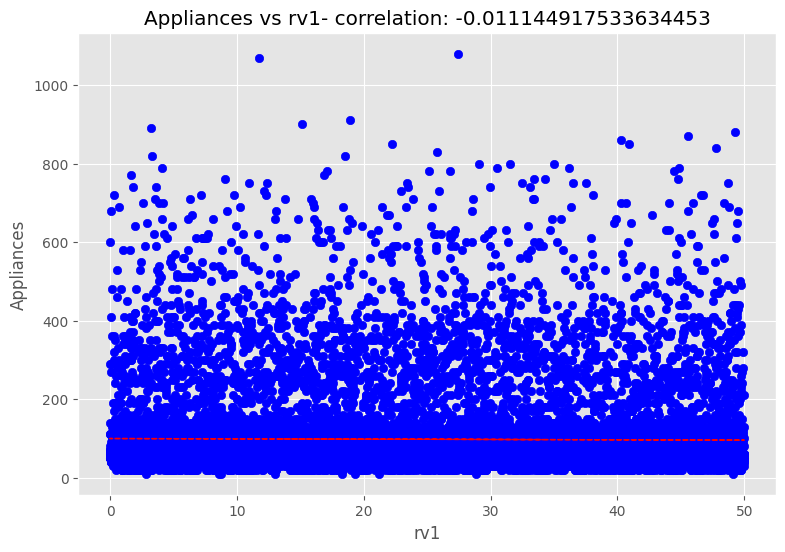

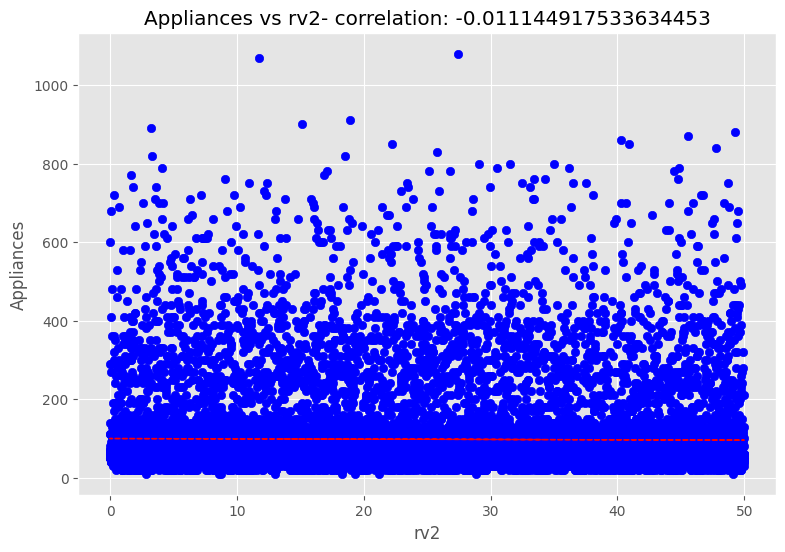

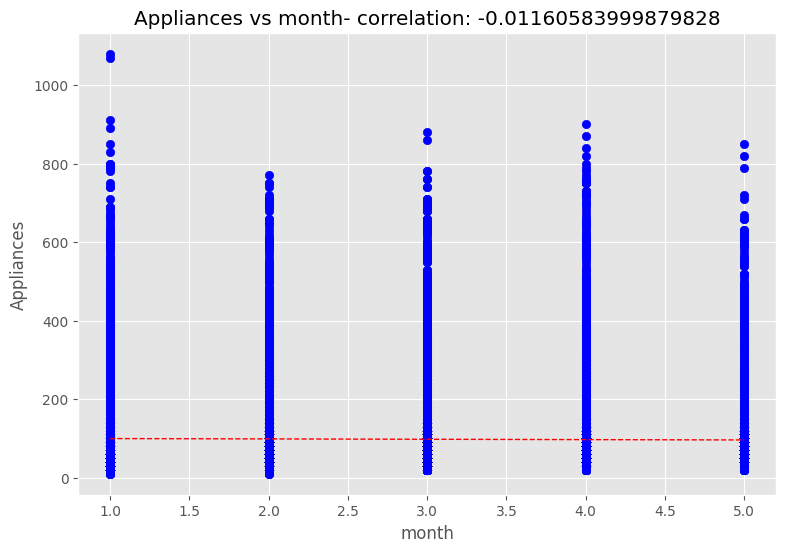

In [44]:
for col in num_feats[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color ='blue' )
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Bivariate Analysis**

#### **Energy consumption on monthly basis**

   month  Appliances
0      1      283510
1      2      421550
2      3      432800
3      4      427200
4      5      362950


Text(0.5, 1.0, 'Monthly_energy_consumption')

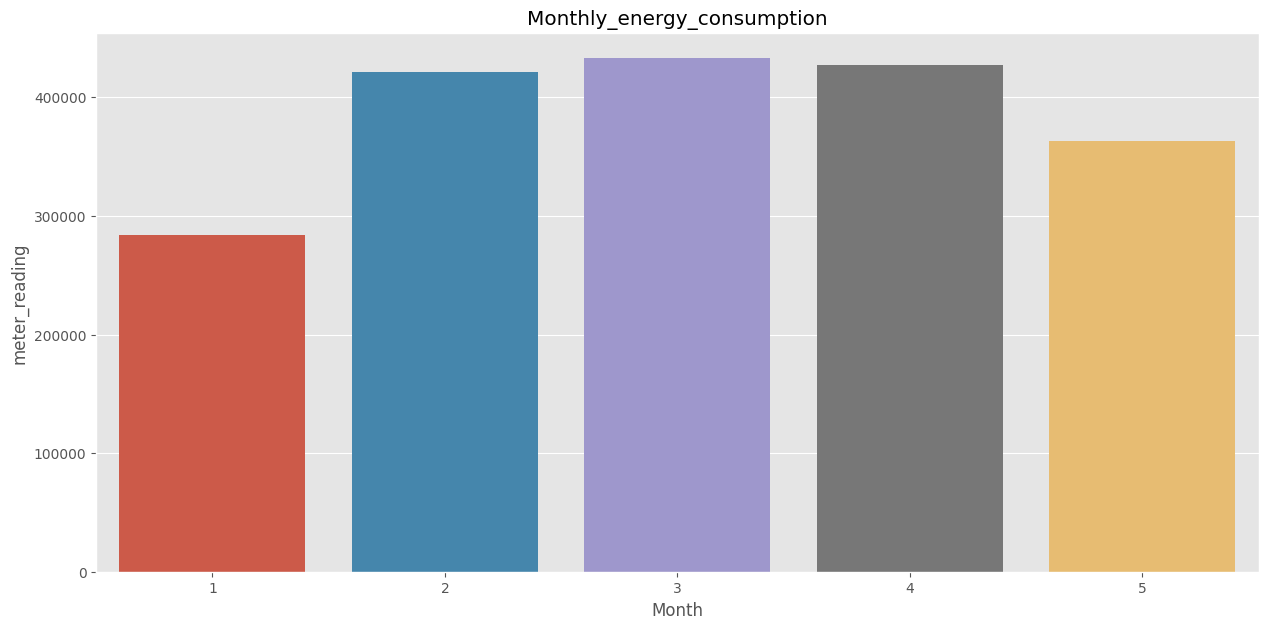

In [45]:
# every month meter reading histogram plot 
Monthly_reading = df.groupby(['month'])['Appliances'].sum().reset_index()
print(Monthly_reading)
plt.figure(figsize=(15,7))
sns.barplot(x=Monthly_reading['month'],y = Monthly_reading['Appliances'],)
plt.xlabel('Month')
plt.ylabel('meter_reading')
plt.title("Monthly_energy_consumption")

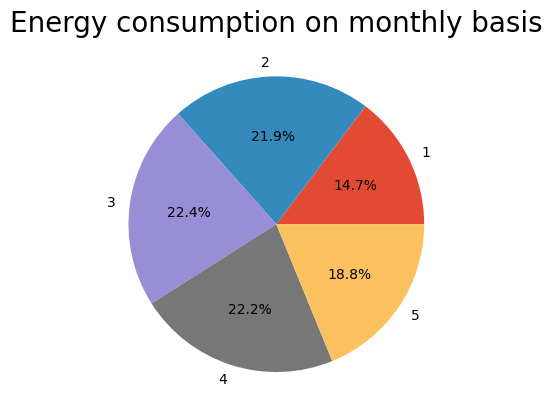

In [46]:
sums = df.groupby(["month"])["Appliances"].sum()
fig1, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Energy consumption on monthly basis', fontsize=20)
ax1.pie(sums,labels=sums.index,autopct='%1.1f%%',)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Energy consumption on weekly basis**

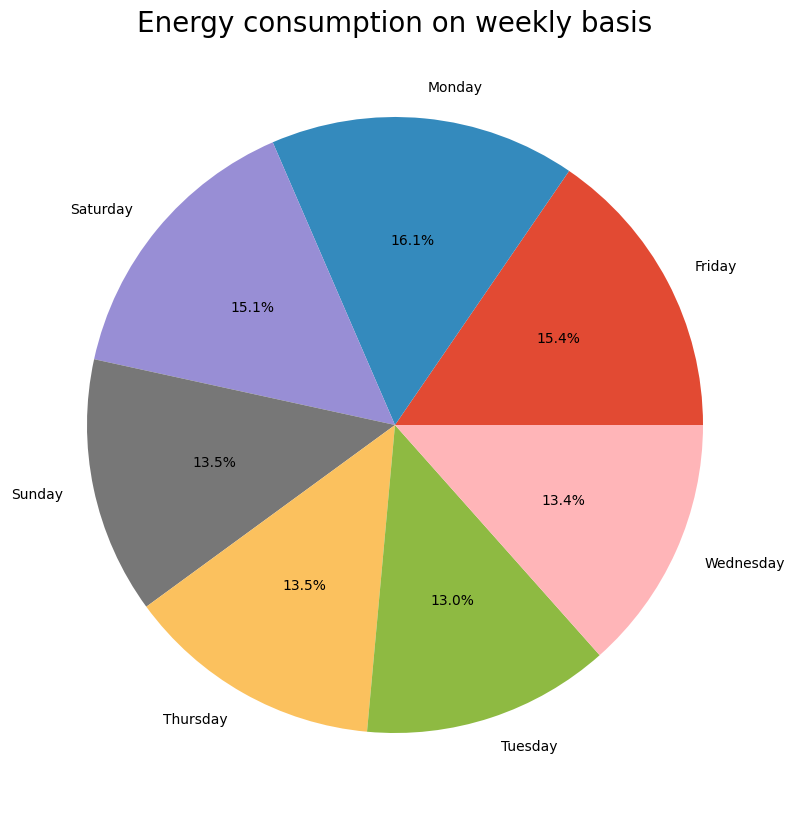

In [47]:
sums = df.groupby(["day_name"])["Appliances"].sum()
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Energy consumption on weekly basis', fontsize=20)
pie(sums, labels=sums.index,autopct='%1.1f%%');
show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Multivariate Analysis**

#### **Outside Temperature based on monthly and weekly data**

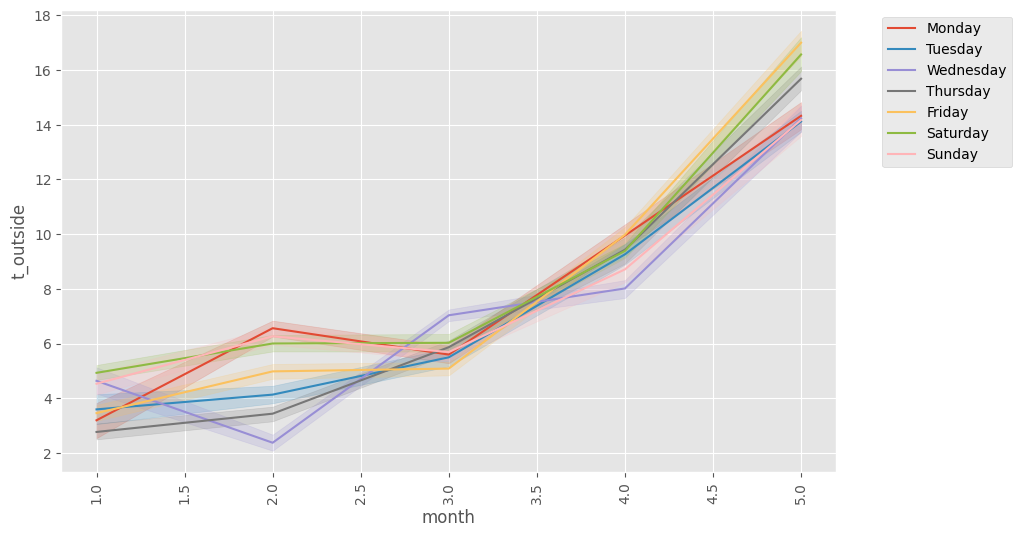

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='t_outside', data=df, hue='day_name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Total Temp vs Total Humidity vs Appliances**

In [100]:
df['Temperature_total'] = df['t_kitchen'] + df['t_living'] + df['t_laundry'] + df['t_office'] + df['t_bath'] + df['t_outside'] + df['t_iron'] + df['t_teen'] + df['t_parents']+df['t_station']
df['Humidity_total'] = df['h_kitchen'] + df['h_living'] + df['h_laundry'] + df['h_office'] + df['h_bath'] + df['h_outside'] + df['h_iron'] + df['h_teen'] + df['h_parents']+df['h_station']
df['log_appliances'] = np.log10(df.Appliances)
aa=df.groupby('month')[('Temperature_total','Humidity_total','Appliances')].mean()
aa

Temperature_total  Humidity_total  Appliances
month                                               
1             156.294533      533.041913   97.026010
2             169.502877      505.903780  100.945881
3             173.496385      447.199099   96.953405
4             188.422765      430.001035   98.888889
5             216.908728      424.501057   94.199325

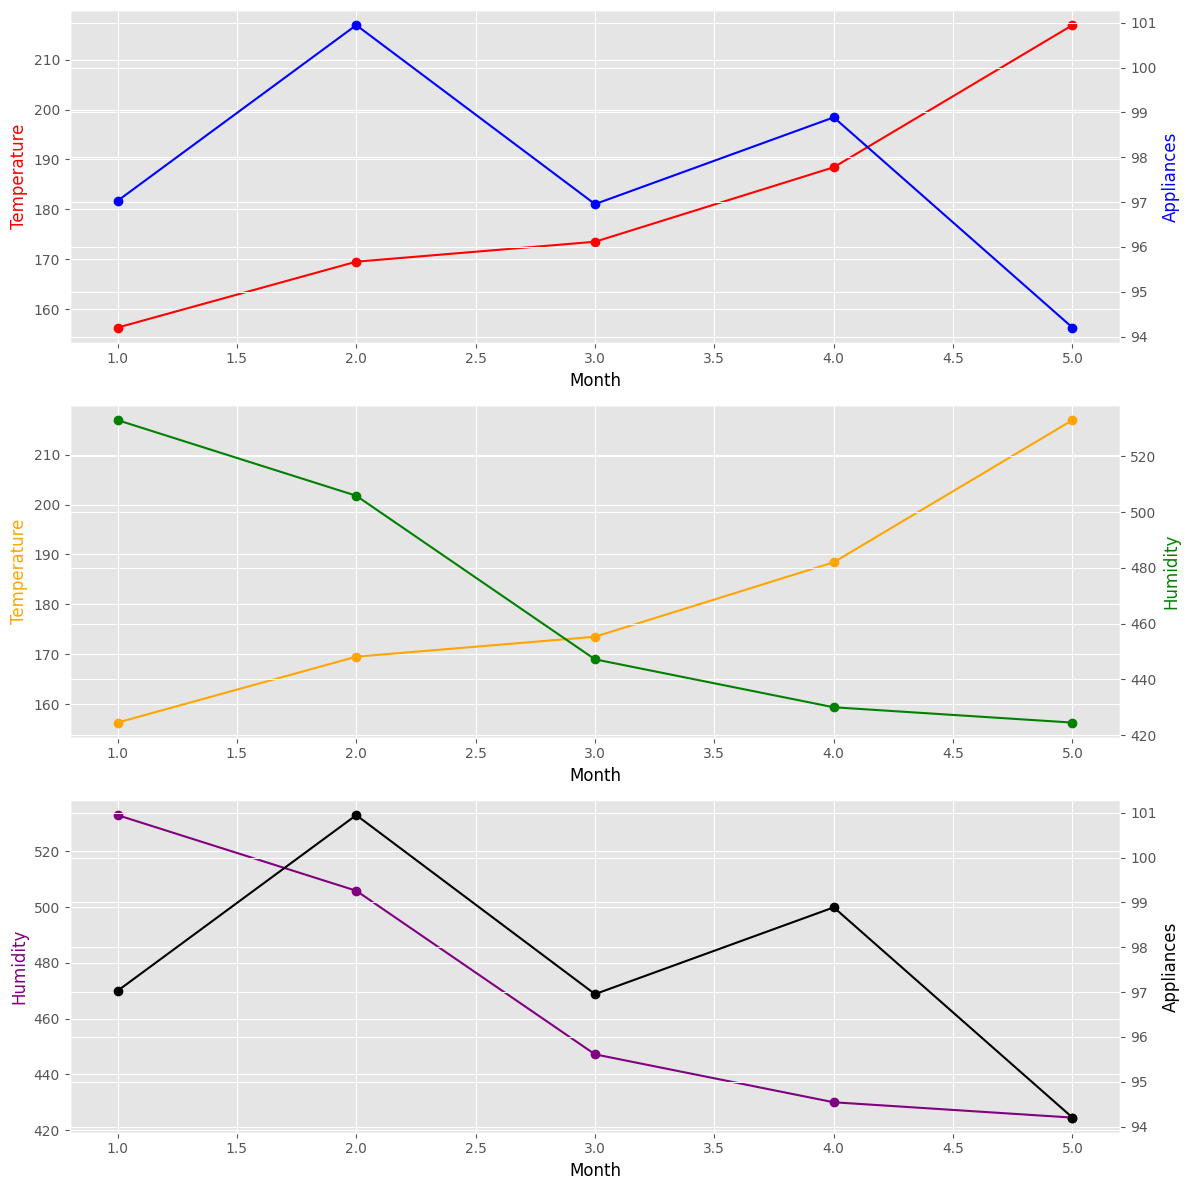

In [101]:

# Multivariate Analysis of variables using lineplots
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.autolayout"] = True

ax0 = plt.subplot(311)
ax1 = ax0.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax2 = plt.subplot(312)
ax3 = ax2.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax4 = plt.subplot(313)
ax5 = ax4.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax0.get_shared_x_axes().join(ax0, ax1)
ax2.get_shared_x_axes().join(ax2, ax3)
ax4.get_shared_x_axes().join(ax4, ax5)
ax0.set_xlabel('Month',color='Black')
ax2.set_xlabel('Month',color='Black')
ax4.set_xlabel('Month',color='Black')
c1, = ax0.plot(aa.index ,aa.Temperature_total, color="red", marker="o")
ax0.set_ylabel('Temperature',color='Red')
c2, = ax1.plot(aa.index,aa.Appliances,color="blue",marker="o")
ax1.set_ylabel('Appliances',color="blue")
c3, = ax2.plot(aa.index ,aa.Temperature_total, color="orange", marker="o",label='Temperature')
ax2.set_ylabel('Temperature',color="orange")
c4, = ax3.plot(aa.index,aa.Humidity_total,color="green",marker="o",label='Humidity')
ax3.set_ylabel('Humidity',color="green")
c5, = ax4.plot(aa.index,aa.Humidity_total,color="purple",marker="o")
ax4.set_ylabel('Humidity',color="purple")
c6, = ax5.plot(aa.index,aa.Appliances,color="black",marker="o")
ax5.set_ylabel('Appliances',color="black")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Correlation Heatmap**

<Axes: >

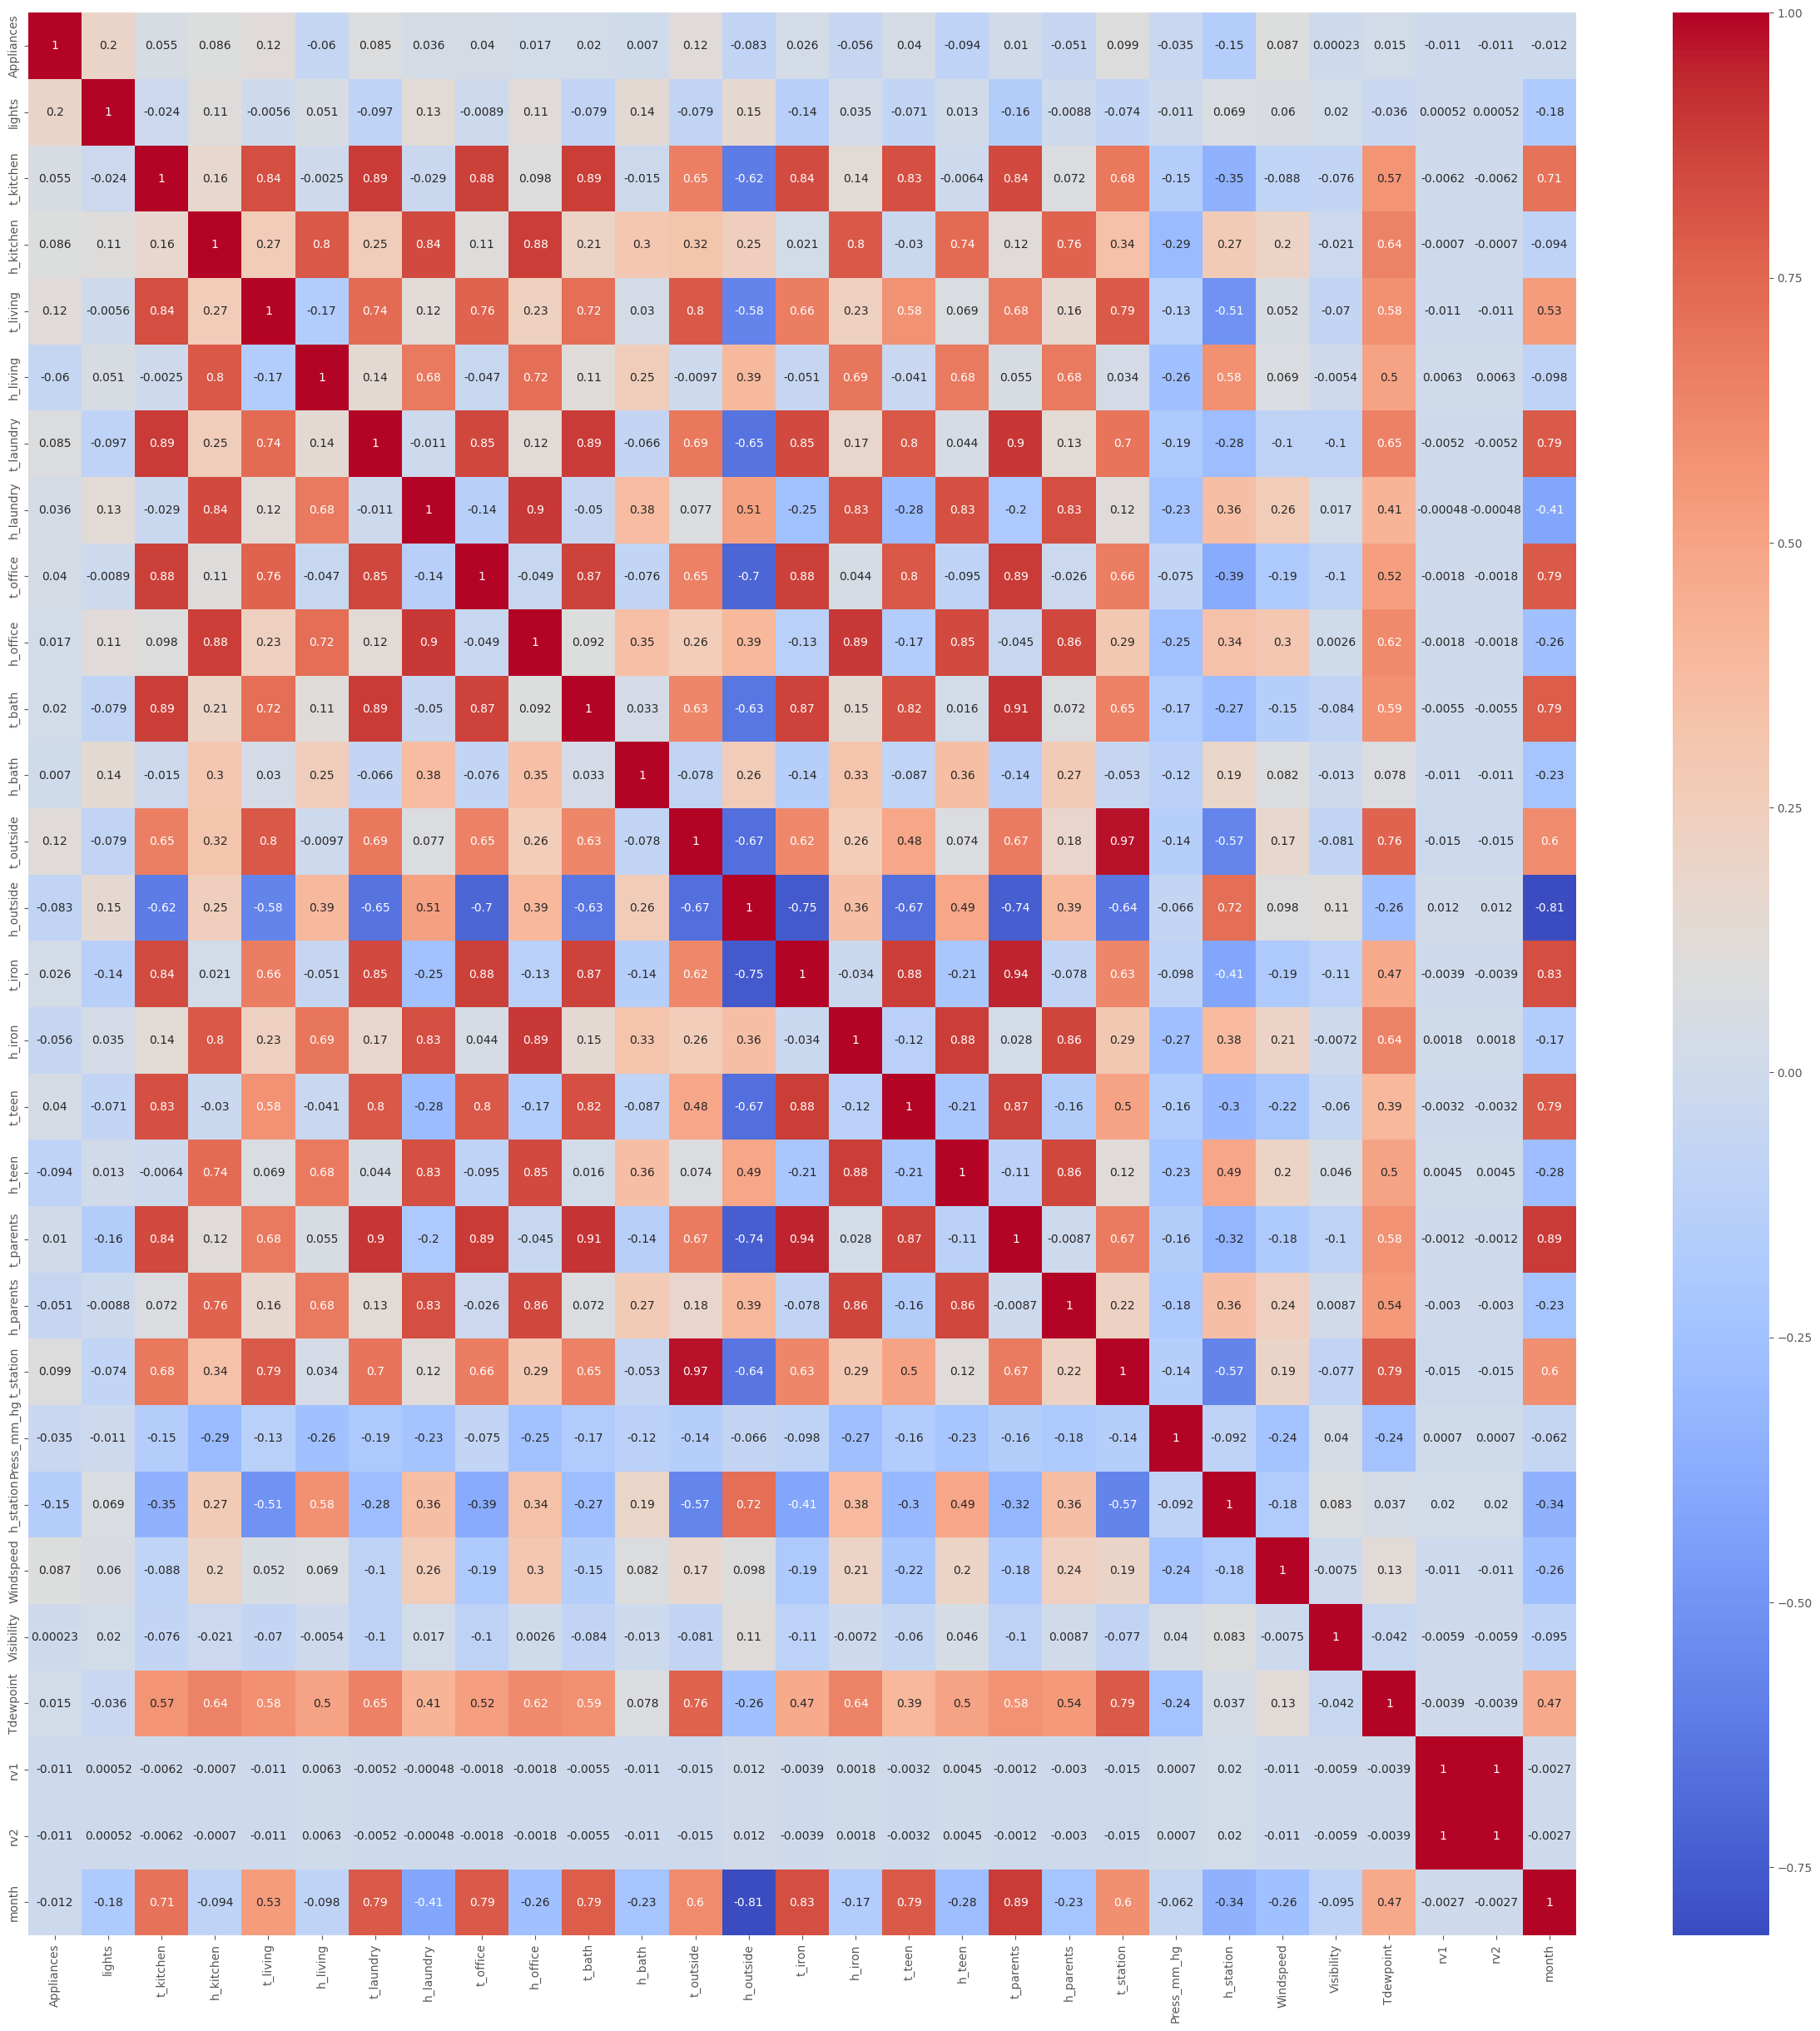

In [56]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [60]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [61]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [62]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [63]:
# Expand Contraction

#### 2. Lower Casing

In [64]:
# Lower Casing

#### 3. Removing Punctuations

In [65]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [66]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [67]:
# Remove Stopwords

In [68]:
# Remove White spaces

#### 6. Rephrase Text

In [69]:
# Rephrase Text

#### 7. Tokenization

In [70]:
# Tokenization

#### 8. Text Normalization

In [71]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [72]:
# POS Taging

#### 10. Text Vectorization

In [73]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [74]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [75]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [76]:
# Transform Your data

### 6. Data Scaling

In [77]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [78]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [79]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [80]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [81]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [84]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [86]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [87]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [89]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [90]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***